<a href="https://colab.research.google.com/github/mamontovatetiana/MyJupyterNotebooks./blob/main/Mamontova_TV_Bachelor_Diploma_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ====== –ö–†–û–ö -1.0: –Ü–º–ø–æ—Ä—Ç —Ç–∞ –∑–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è ======
from google.colab import files
import io, re, numpy as np, pandas as pd

uploaded = files.upload()  # –æ–±–µ—Ä–∏ —Å–≤—ñ–π .xlsx
file_name = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[file_name]))
print("Shape:", df.shape); display(df.head(3))


Saving PYTHON MODELING.csv.xlsx to PYTHON MODELING.csv.xlsx
Shape: (252, 19)


year   year train year test  Gender  Age  Family living nearby  \
0   2023                  2023       0   21                     0   
1   2023                  2023       0   21                     0   
2   2023                  2023       0   22                     1   

   Marital status  Working Status  Internally Displaced Persons   GPA  \
0               0               0                              0  3.7   
1               0               1                              1  3.5   
2               0               0                              1  4.6   

   Current Smokers  Current Drinkers  Deceased Relatives  –°ombatants  \
0                0                 1                   0           0   
1                0                 1                   0           0   
2                0                 0                   0           0   

   Anxiety GAD 7  Depression PHQ 9  Avoidance Subscale IESR  \
0              4                 0                        1   
1              5                 9                       14   
2              2                 1                        0   

   Intrusion Subscale IESR  Hyperarousal Subscale IESR  PTSD HTQ 5  
0                        0                           3           0  
1                       14                           7           0  
2                        2                           0           0

In [2]:
# ====== –ö–†–û–ö -1.1: –ü–æ—à—É–∫ IES/HTQ —Ç–∞ –ø–æ–±—É–¥–æ–≤–∞ —Ü—ñ–ª—å–æ–≤–æ—ó 'Vulnerability' ======
# –ü–æ—Ä–æ–≥–æ–≤—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –∑—ñ —Å—Ç–∞—Ç–µ–π: IES-R ‚â• 33; HTQ-5 ‚â• 2.5
IES_THR, HTQ_THR = 33.0, 2.5

# 1) –∑–Ω–∞–π–¥–µ–º–æ total IES –∞–±–æ –≤—ñ–¥–±—É–¥—É—î–º–æ –∑ –ø—ñ–¥—à–∫–∞–ª
ies_total_col = None
ies_total_candidates = [c for c in df.columns if re.search(r'(total.*ies|ies.*total|total mean ies|ies_total_computed)', c, re.I)]
ies_sub_cols = [c for c in df.columns if re.search(r'(avoidance.*iesr|intrusion.*iesr|hyperarousal.*iesr)', c, re.I)]
if ies_total_candidates:
    ies_total_col = ies_total_candidates[0]
elif len(ies_sub_cols) >= 3:
    for c in ies_sub_cols:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    df['IES_total_computed'] = df[ies_sub_cols].sum(axis=1, skipna=True)
    ies_total_col = 'IES_total_computed'

# 2) –∑–Ω–∞–π–¥–µ–º–æ HTQ-5
htq_col = None
htq_candidates = [c for c in df.columns if re.search(r'(htq\s*-?\s*5|htq5|htq)', c, re.I)]
if htq_candidates:
    htq_col = htq_candidates[0]

print("IES total:", ies_total_col)
print("HTQ-5:", htq_col)

# 3) —á–∏—Å–ª–æ–≤—ñ —Ç–∞—Ä–≥–µ—Ç–∏
if ies_total_col is not None:
    df[ies_total_col] = pd.to_numeric(df[ies_total_col], errors='coerce')
    df['target_IES'] = (df[ies_total_col] >= IES_THR).astype(int)
else:
    df['target_IES'] = 0

if htq_col is not None:
    df[htq_col] = pd.to_numeric(df[htq_col], errors='coerce')
    df['target_HTQ'] = (df[htq_col] >= HTQ_THR).astype(int)
else:
    df['target_HTQ'] = 0

# 4) –û—Å–Ω–æ–≤–Ω–∞ –º—ñ—Ç–∫–∞ (–ª–æ–≥—ñ–∫–∞ OR –∑–∞ —Å—Ç–∞—Ç—Ç—è–º–∏): —Ö–æ—á–∞ –± –æ–¥–∏–Ω –ø–æ–∑–∏—Ç–∏–≤–Ω–∏–π
df['Vulnerability'] = ((df['target_IES']==1) | (df['target_HTQ']==1)).astype(int)

# –∫–æ—Ä–æ—Ç–∫–∏–π –∑–≤—ñ—Ç
print("\n=== PREVALENCE OVERALL ===")
print(df['Vulnerability'].value_counts().rename('count'))
print("share(1):", df['Vulnerability'].mean().round(3))

# –∑–∞ —Ä–æ–∫–∞–º–∏, —è–∫—â–æ —î
year_col = None
for c in df.columns:
    if df[c].astype(str).str.contains(r'20(23|24|25)').any():
        year_col = c; break
if year_col:
    tmp = df.copy()
    tmp[year_col] = tmp[year_col].astype(str).str.extract(r'(20\d{2})', expand=False)
    print("\n=== PREVALENCE BY YEAR ===")
    display(tmp.groupby(year_col)['Vulnerability'].agg(['count','sum','mean']))
else:
    print("Year column not found (ok).")


IES total: IES_total_computed
HTQ-5: PTSD HTQ 5

=== PREVALENCE OVERALL ===
Vulnerability
0    191
1     61
Name: count, dtype: int64
share(1): 0.242

=== PREVALENCE BY YEAR ===


/tmp/ipython-input-3666496243.py:50: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if df[c].astype(str).str.contains(r'20(23|24|25)').any():


count  sum      mean
year                       
2023     130   32  0.246154
2024      32    9  0.281250
2025      90   20  0.222222

In [3]:
# ====== –ö–†–û–ö -1.2: –ö–æ–¥—É–≤–∞–Ω–Ω—è –∫–∞—Ç–µ–≥–æ—Ä—ñ–π (Label + One-Hot), –±–µ–∑ –≤–∏—Ç–æ–∫—ñ–≤ ======
from sklearn.preprocessing import LabelEncoder

df_enc = df.copy()

# (–∞) —Ç–µ–∫—Å—Ç–æ–≤—ñ ‚Üí —Ä–æ–∑–¥—ñ–ª–∏–º–æ –Ω–∞ –±—ñ–Ω–∞—Ä–Ω—ñ (LabelEncoder) —Ç–∞ –∑ ‚â§10 —Ä—ñ–≤–Ω—ñ–≤ (One-Hot)
cat_cols = [c for c in df_enc.columns if df_enc[c].dtype=='object']
label_cols, onehot_cols = [], []
for c in cat_cols:
    nun = df_enc[c].nunique(dropna=True)
    if nun <= 2: label_cols.append(c)
    elif nun <= 10: onehot_cols.append(c)
    # —è–∫—â–æ –±—ñ–ª—å—à–µ 10 ‚Äî —á–∞—Å—Ç–æ –∫—Ä–∞—â–µ Label, –∞–ª–µ –æ–±–µ—Ä–µ–∂–Ω–æ; –ø–æ–∫–∏ –ø—Ä–æ–ø—É—Å—Ç–∏–º–æ

le_map = {}
for c in label_cols:
    le = LabelEncoder()
    df_enc[c+'_le'] = le.fit_transform(df_enc[c].astype(str))
    le_map[c] = le

df_enc = pd.get_dummies(df_enc, columns=onehot_cols, drop_first=True)
print("Encoded shape:", df_enc.shape)


Encoded shape: (252, 23)


In [4]:
# ====== –ö–†–û–ö -1.3: –í–∏–±—ñ—Ä —Ñ—ñ—á (features) –ë–ï–ó –≤–∏—Ç–æ–∫—ñ–≤ —ñ —Ç–µ—Ö–Ω—ñ—á–Ω–∏—Ö –∫–æ–ª–æ–Ω–æ–∫ ======
# –í–∏—Ç–æ–∫–∏ (leak): –Ω—ñ—è–∫–∏—Ö IES/HTQ –∞–±–æ —ó—Ö –ø—ñ–¥—à–∫–∞–ª —É —Ñ—ñ—á–∞—Ö.
leak_cols = []
if ies_total_col: leak_cols.append(ies_total_col)
if htq_col: leak_cols.append(htq_col)
leak_cols += ies_sub_cols

# –¢–µ—Ö–Ω—ñ—á–Ω—ñ –∫–æ–ª–æ–Ω–∫–∏ (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, 'year train year test')
tech_patterns = [r'train', r'test', r'year\s*train\s*year\s*test']
tech_cols = [c for c in df_enc.columns if any(re.search(p, c, re.I) for p in tech_patterns)]

# –¢–∞—Ä–≥–µ—Ç–∏/—Å–ª—É–∂–±–æ–≤—ñ
exclude_base = ['Vulnerability','target_IES','target_HTQ']

# id-–ø–æ–¥—ñ–±–Ω—ñ
id_like = [c for c in df_enc.columns if re.search(r'(‚Ññ|id|–∫–æ–¥|index)', str(c), re.I)]

# –ó–∞–±–æ—Ä–æ–Ω—è—î–º–æ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞—Ç–∏ —Ä—ñ–∫ —è–∫ —Ñ—ñ—á—É (–≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ —Ç—ñ–ª—å–∫–∏ –¥–ª—è —Ä–æ–∑–±–∏—Ç—Ç—è/—Ä–µ–ø–æ—Ä—Ç—É)
exclude = set(exclude_base + leak_cols + tech_cols + id_like)
all_numeric = [c for c in df_enc.select_dtypes(include=[np.number]).columns]
features = [c for c in all_numeric if c not in exclude and (year_col is None or c != year_col)]

print("Features (count):", len(features))
print(features)


Features (count): 13
['Gender', 'Age', 'Family living nearby', 'Marital status', 'Working Status', 'Internally Displaced Persons ', 'GPA', 'Current Smokers', 'Current Drinkers', 'Deceased Relatives', '–°ombatants', 'Anxiety GAD 7', 'Depression PHQ 9']


In [5]:
# ====== –ö–†–û–ö -1.4: –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü—ñ—è ======
from sklearn.preprocessing import StandardScaler

df_model = df_enc[~df_enc['Vulnerability'].isna()].copy()
X = df_model[features].fillna(0)
y = df_model['Vulnerability'].astype(int)

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
print("X_sc:", X_sc.shape, "y:", y.shape)


X_sc: (252, 13) y: (252,)


In [6]:
# ====== –ö–†–û–ö 2.1: –°—Ç—Ä–∞—Ç–∏—Ñ—ñ–∫–æ–≤–∞–Ω–∏–π 80/20 (—Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–Ω–æ –¥–ª—è —Ç–≤–æ—ó—Ö –¥–∞–Ω–∏—Ö) ======
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_sc, y.values, test_size=0.2, stratify=y, random_state=42
)
print("Train classes:", np.unique(y_train, return_counts=True))
print("Test  classes:", np.unique(y_test,  return_counts=True))


Train classes: (array([0, 1]), array([152,  49]))
Test  classes: (array([0, 1]), array([39, 12]))


In [7]:
# ====== –ö–†–û–ö 2.2: –ë–∞–ª–∞–Ω—Å—É–≤–∞–Ω–Ω—è (SMOTE) –ª–∏—à–µ –Ω–∞ train ======
!pip -q install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("After SMOTE:", np.unique(y_train_sm, return_counts=True))


After SMOTE: (array([0, 1]), array([152, 152]))


In [9]:
# ====== –ö–†–û–ö 2.3: –ú–æ–¥–µ–ª—å 1 ‚Äî Decision Tree ======
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight

cw_vals = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {cls:w for cls,w in zip(np.unique(y_train), cw_vals)}

dt = DecisionTreeClassifier(max_depth=4, class_weight=class_weights, random_state=42)
dt.fit(X_train_sm, y_train_sm)
y_pred_dt  = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:,1]


In [10]:
# ====== –ö–†–û–ö 2.4: –ú–æ–¥–µ–ª—å 2 ‚Äî XGBoost (–∑ GridSearchCV) ======
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV

xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)
param_grid = {'n_estimators':[100,200], 'max_depth':[3,5], 'learning_rate':[0.01,0.05,0.1]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(xgb_clf, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=0)
gs.fit(X_train_sm, y_train_sm)
best_xgb = gs.best_estimator_
print("Best XGB params:", gs.best_params_)

y_pred_xgb  = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:,1]


Best XGB params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [11]:
# ====== –ö–†–û–ö 2.5: –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π ======
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
import pandas as pd

def metrics(y_true, y_pred, y_proba):
    return {
        'accuracy':  accuracy_score(y_true,y_pred),
        'precision': precision_score(y_true,y_pred, zero_division=0),
        'recall':    recall_score(y_true,y_pred, zero_division=0),
        'f1':        f1_score(y_true,y_pred, zero_division=0),
        'roc_auc':   roc_auc_score(y_true,y_proba)
    }

summary = pd.DataFrame({
    'DecisionTree': metrics(y_test, y_pred_dt,  y_proba_dt),
    'XGBoost':      metrics(y_test, y_pred_xgb, y_proba_xgb),
}).T
display(summary)


accuracy  precision    recall        f1   roc_auc
DecisionTree  0.666667   0.400000  0.833333  0.540541  0.756410
XGBoost       0.784314   0.533333  0.666667  0.592593  0.792735

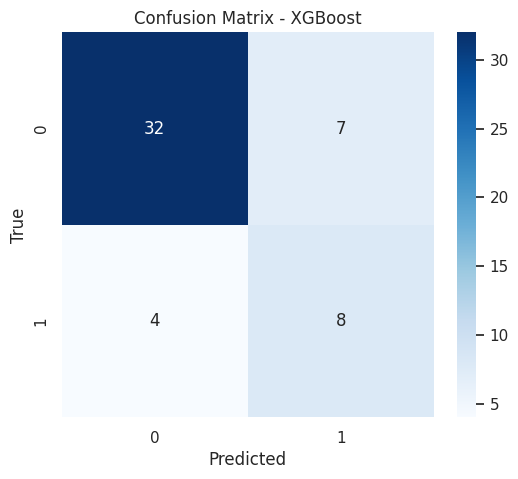

XGBoost classification report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85        39
           1       0.53      0.67      0.59        12

    accuracy                           0.78        51
   macro avg       0.71      0.74      0.72        51
weighted avg       0.81      0.78      0.79        51



In [12]:
# ====== –ö–†–û–ö 3.1: Confusion Matrix –¥–ª—è XGBoost ======
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
sns.set(style='whitegrid'); plt.rcParams['figure.figsize']=(6,5)

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost'); plt.xlabel('Predicted'); plt.ylabel('True'); plt.show()

print("XGBoost classification report:\n", classification_report(y_test, y_pred_xgb))


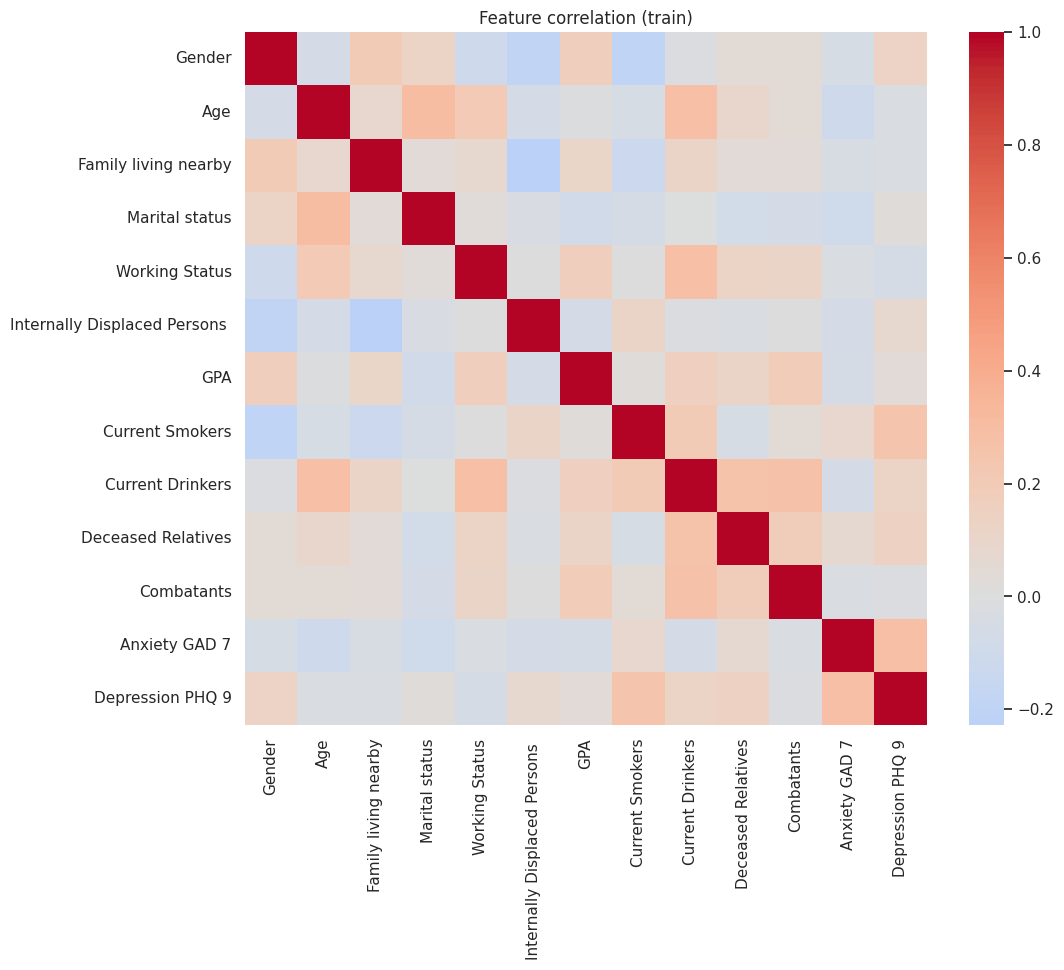

In [13]:
# ====== –ö–†–û–ö 3.2: Heatmap –∫–æ—Ä–µ–ª—è—Ü—ñ–π —Ñ—ñ—á (–Ω–∞ train) ======
corr = pd.DataFrame(X_train, columns=features).corr()
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature correlation (train)'); plt.show()


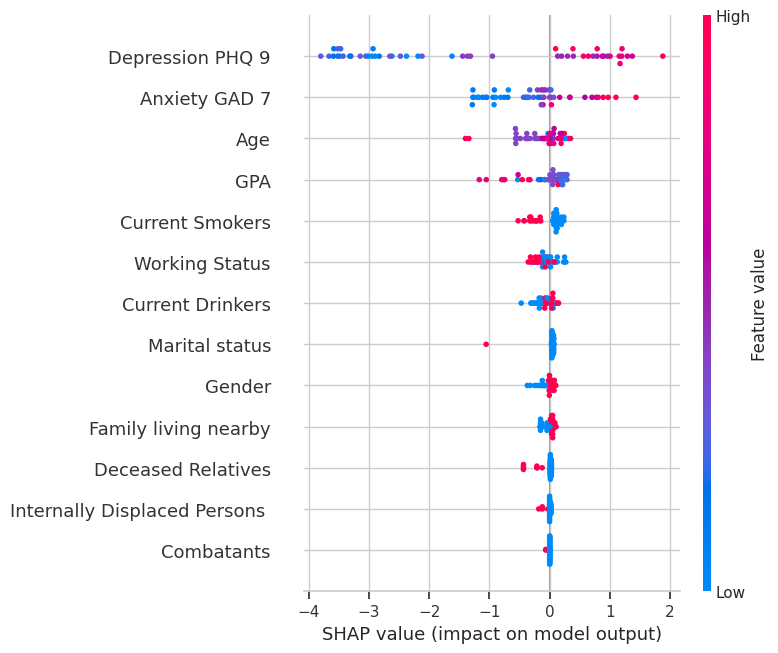

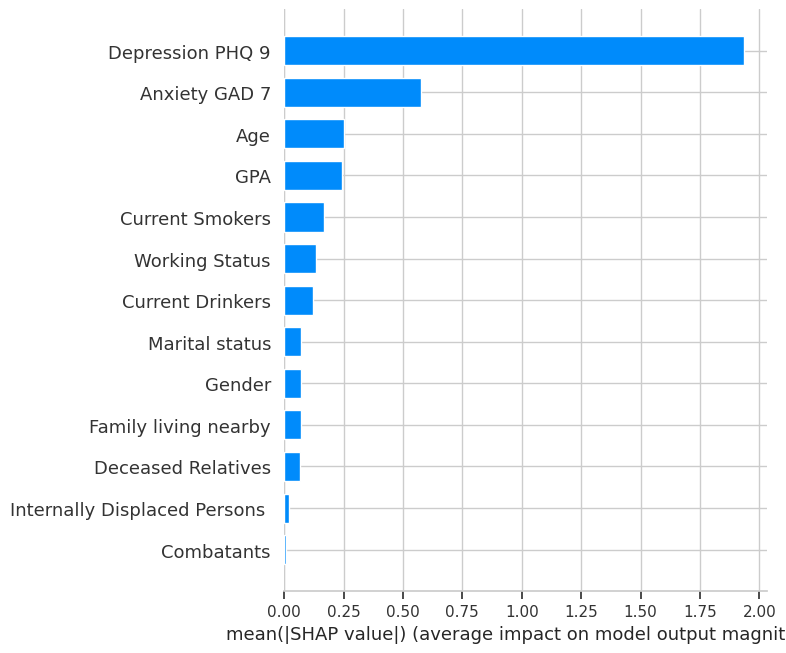

In [14]:
# ====== –ö–†–û–ö 4: SHAP (summary + bar) –¥–ª—è XGBoost ======
import shap, numpy as np
explainer = shap.TreeExplainer(best_xgb)
idx = np.random.choice(X_test.shape[0], min(200, X_test.shape[0]), replace=False)
X_sample = X_test[idx]
shap_vals = explainer.shap_values(X_sample)

shap.summary_plot(shap_vals, pd.DataFrame(X_sample, columns=features), show=True)
shap.summary_plot(shap_vals, pd.DataFrame(X_sample, columns=features), plot_type='bar', show=True)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


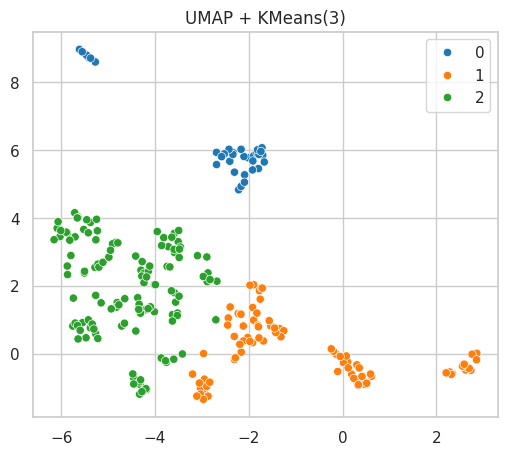

count  sum      mean
cluster_k3                      
0              38   11  0.289474
1              87   23  0.264368
2             127   27  0.212598

Saved: /content/PREP_with_clusters.csv


In [15]:
# ====== –ö–†–û–ö 5: UMAP (–∞–±–æ PCA) + KMeans(3) ======
try:
    import umap
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    X_2d = reducer.fit_transform(X_sc)
    method_name = "UMAP"
except Exception as e:
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2, random_state=42)
    X_2d = pca.fit_transform(X_sc)
    method_name = "PCA (fallback)"
    print("UMAP not available, using PCA. Err:", e)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_2d)
labels = kmeans.labels_

sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=labels, palette='tab10')
plt.title(f'{method_name} + KMeans(3)'); plt.show()

df_clusters = df_model.copy().reset_index(drop=True)
df_clusters['dim0'] = X_2d[:,0]
df_clusters['dim1'] = X_2d[:,1]
df_clusters['cluster_k3'] = labels
display(df_clusters.groupby('cluster_k3')['Vulnerability'].agg(['count','sum','mean']))

# –∑–±–µ—Ä–µ–∂–µ–º–æ –≤–µ—Ä—Å—ñ—é –¥–ª—è –∑–≤—ñ—Ç—É/–¥–æ–¥–∞—Ç–∫—ñ–≤
df_clusters.to_csv('/content/PREP_with_clusters.csv', index=False)
print("Saved: /content/PREP_with_clusters.csv")


MLP report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        39
           1       0.46      0.50      0.48        12

    accuracy                           0.75        51
   macro avg       0.65      0.66      0.66        51
weighted avg       0.75      0.75      0.75        51

ROC-AUC (MLP): 0.6965811965811965


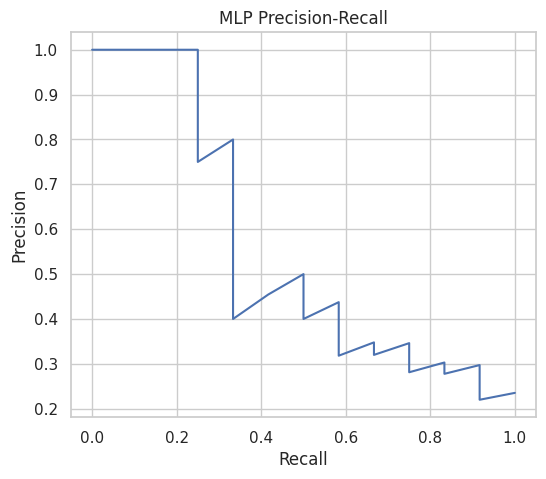

MLP threshold for Recall‚â•0.8: thr=0.000, Precision=0.303, Recall=0.833
MLP@thr report:
               precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.30      0.83      0.44        12

    accuracy                           0.51        51
   macro avg       0.60      0.62      0.50        51
weighted avg       0.75      0.51      0.53        51



In [16]:
# ====== –ö–†–û–ö 6.1: MLP (BPNN) ======
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, auc

mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)
mlp.fit(X_train_sm, y_train_sm)
y_pred_mlp  = mlp.predict(X_test)
y_proba_mlp = mlp.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print("MLP report:\n", classification_report(y_test, y_pred_mlp))
print("ROC-AUC (MLP):", roc_auc_score(y_test, y_proba_mlp))

# PR-–∫—Ä–∏–≤–∞ + –ø—Ä–∏–∫–ª–∞–¥ –≤–∏–±–æ—Ä—É –ø–æ—Ä–æ–≥—É –ø—ñ–¥ Recall>=0.80
prec, rec, thr = precision_recall_curve(y_test, y_proba_mlp)
plt.plot(rec, prec); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("MLP Precision-Recall"); plt.show()
target_recall = 0.80
cands = [(p,r,t) for p,r,t in zip(prec,rec, np.append(thr,1.0)) if r>=target_recall]
if cands:
    best = max(cands, key=lambda x:x[0])
    sel_thr = best[2]
    print(f"MLP threshold for Recall‚â•{target_recall}: thr={sel_thr:.3f}, Precision={best[0]:.3f}, Recall={best[1]:.3f}")
    y_pred_mlp_thr = (y_proba_mlp >= sel_thr).astype(int)
    print("MLP@thr report:\n", classification_report(y_test, y_pred_mlp_thr))


  0%|          | 0/51 [00:00<?, ?it/s]

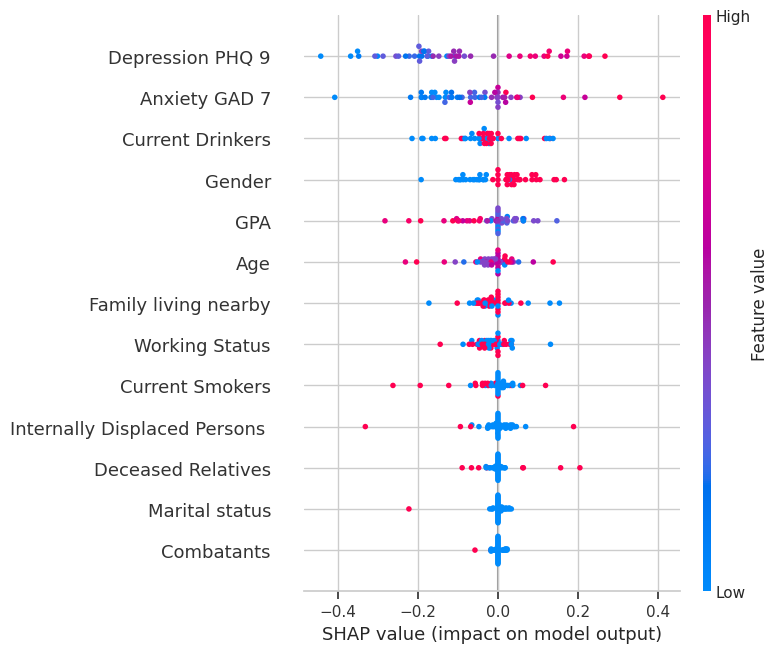

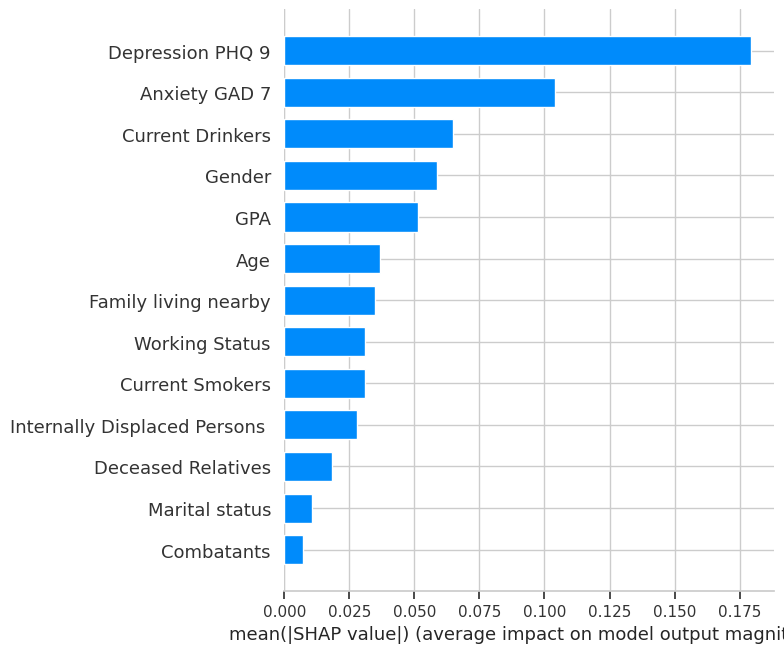

In [17]:
# ====== –ö–†–û–ö 6.2: SHAP –¥–ª—è MLP (KernelExplainer; –ø–æ–≤—ñ–ª—å–Ω–æ ‚Äî –±–µ—Ä–µ–º–æ –Ω–µ–≤–µ–ª–∏–∫–∏–π —Å–µ–º–ø–ª) ======
import shap, numpy as np
# —Ñ-—Ü—ñ—è –ø—Ä–æ–≥–Ω–æ–∑—É –π–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç—ñ –∫–ª–∞—Å—É 1
f = lambda X_: mlp.predict_proba(X_)[:,1]

# –Ω–µ–≤–µ–ª–∏–∫–∏–π background —ñ sample –¥–ª—è —à–≤–∏–¥–∫–æ—Å—Ç—ñ
bg_idx = np.random.choice(X_train_sm.shape[0], min(100, X_train_sm.shape[0]), replace=False)
X_bg = X_train_sm[bg_idx]
te_idx = np.random.choice(X_test.shape[0], min(80, X_test.shape[0]), replace=False)
X_te_small = X_test[te_idx]

kernel_expl = shap.KernelExplainer(f, X_bg)
shap_vals_nn = kernel_expl.shap_values(X_te_small, nsamples=100)  # –∑–±—ñ–ª—å—à–∏—à nsamples —è–∫—â–æ –±—É–¥–µ —à–≤–∏–¥–∫–æ

shap.summary_plot(shap_vals_nn, pd.DataFrame(X_te_small, columns=features), show=True)
shap.summary_plot(shap_vals_nn, pd.DataFrame(X_te_small, columns=features), plot_type='bar', show=True)


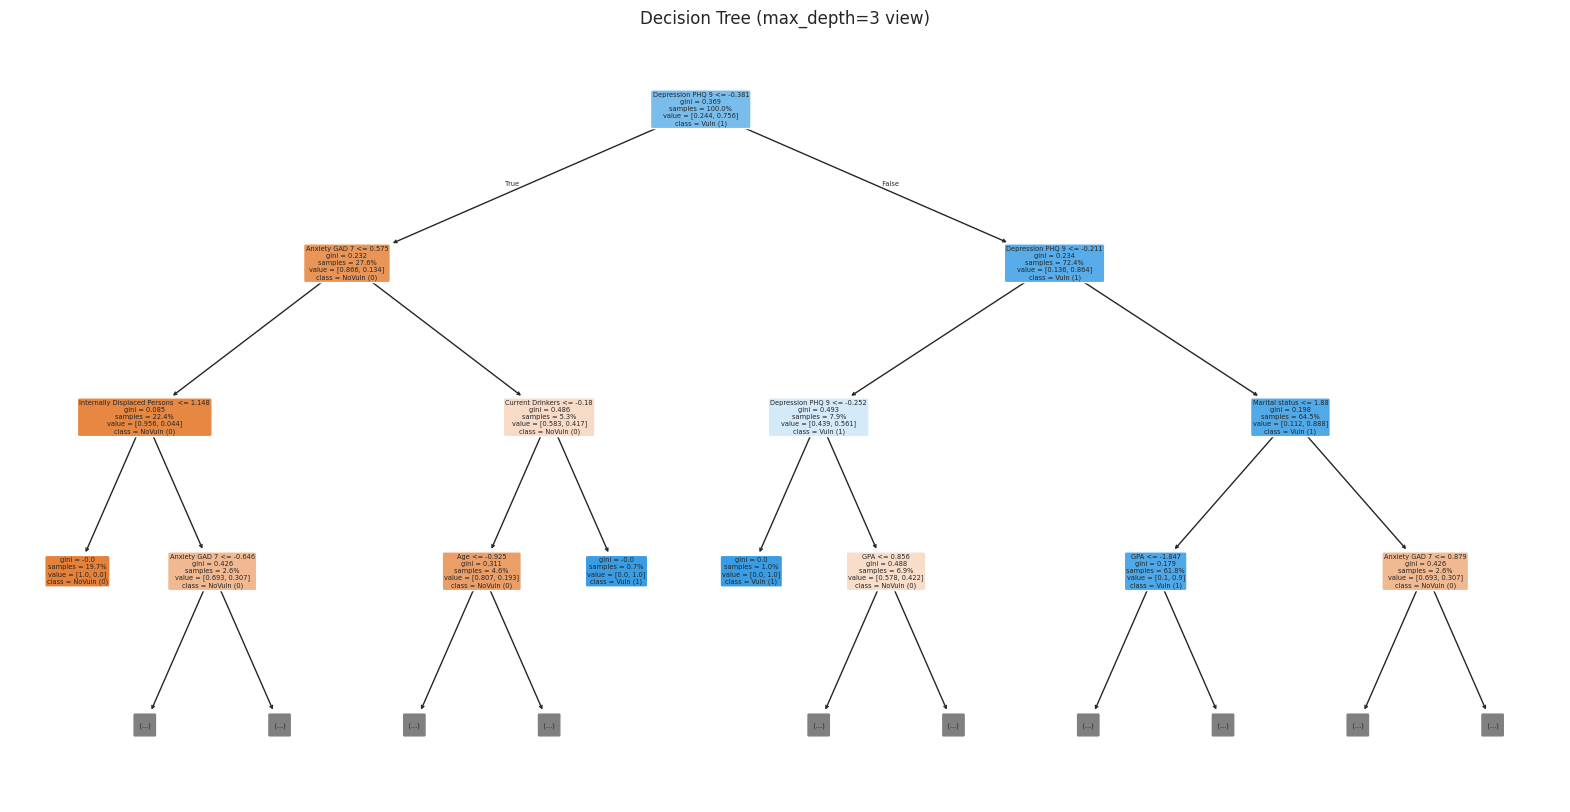

In [18]:
# === –í–Ü–ó–£–ê–õ–Ü–ó–ê–¶–Ü–Ø –°–¢–†–£–ö–¢–£–†–ò DECISION TREE ===
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=features,
    class_names=['NoVuln (0)', 'Vuln (1)'],
    filled=True,
    rounded=True,
    impurity=True,       # Gini —ñ–Ω—Ñ–æ
    proportion=True,     # —á–∞—Å—Ç–∫–∏ –≤ –ª–∏—Å—Ç–∫–∞—Ö
    max_depth=3          # —â–æ–± –±—É–ª–æ —á–∏—Ç–∞–±–µ–ª—å–Ω–æ; –∑–º—ñ–Ω—é–π –∑–∞ –ø–æ—Ç—Ä–µ–±–∏
)
plt.title("Decision Tree (max_depth=3 view)")
plt.show()


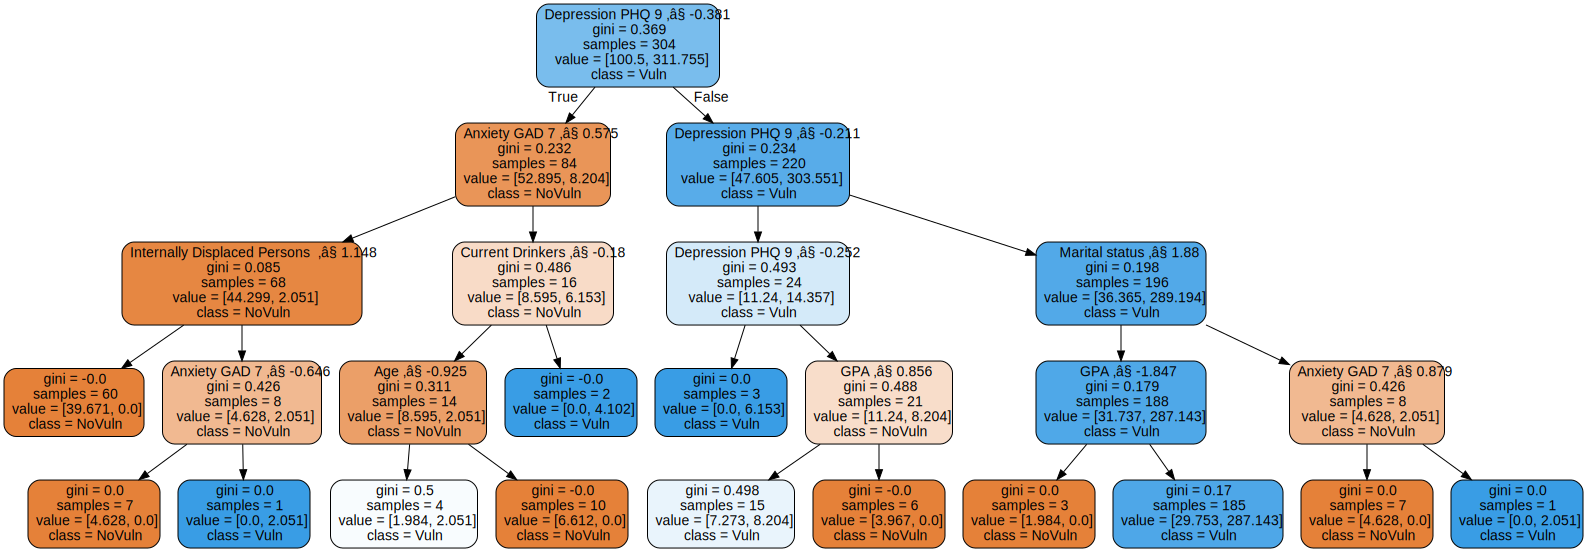

In [19]:
!apt-get -qq install graphviz > /dev/null
!pip -q install graphviz
from sklearn.tree import export_graphviz
import graphviz
dot = export_graphviz(dt, out_file=None, feature_names=features,
                      class_names=['NoVuln','Vuln'], filled=True, rounded=True,
                      special_characters=True, max_depth=None)
graph = graphviz.Source(dot); graph


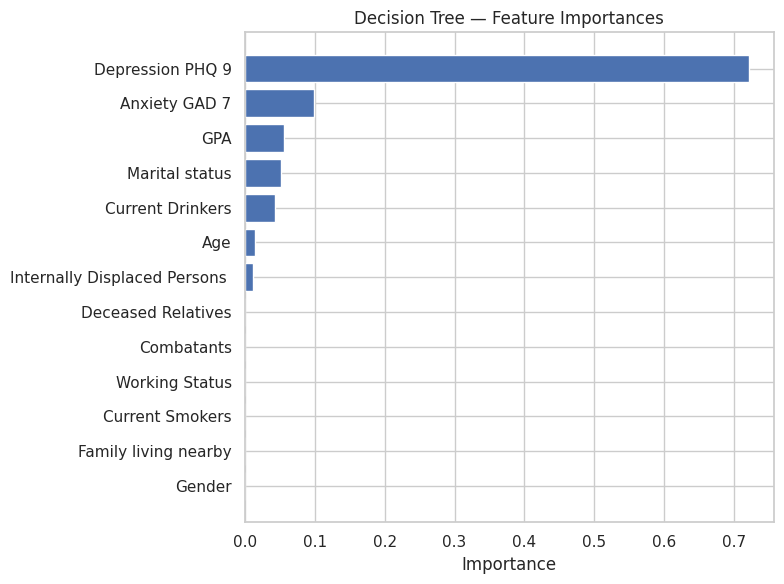

In [20]:
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
idx = np.argsort(importances)[::-1]
top_n = min(15, len(features))

plt.figure(figsize=(8,6))
plt.barh(np.array(features)[idx[:top_n]][::-1], importances[idx[:top_n]][::-1])
plt.title("Decision Tree ‚Äî Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


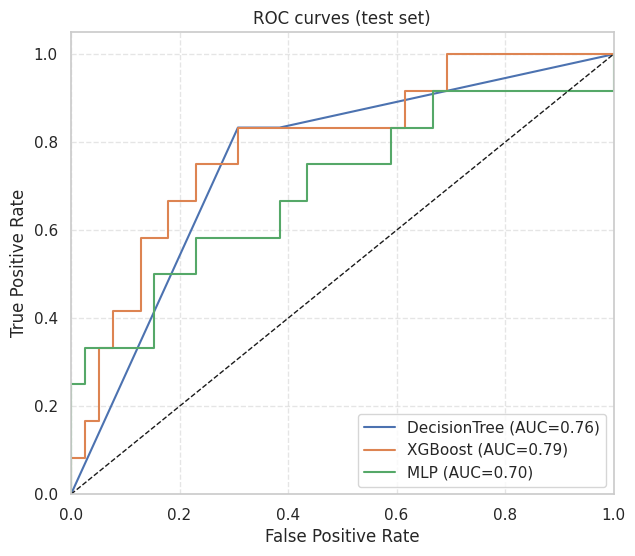

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "DecisionTree": y_proba_dt,
    "XGBoost":      y_proba_xgb,
    "MLP":          y_proba_mlp
}

plt.figure(figsize=(7,6))
for name, proba in models.items():
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1], 'k--', linewidth=1)
plt.xlim([0.0,1.0]); plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC curves (test set)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


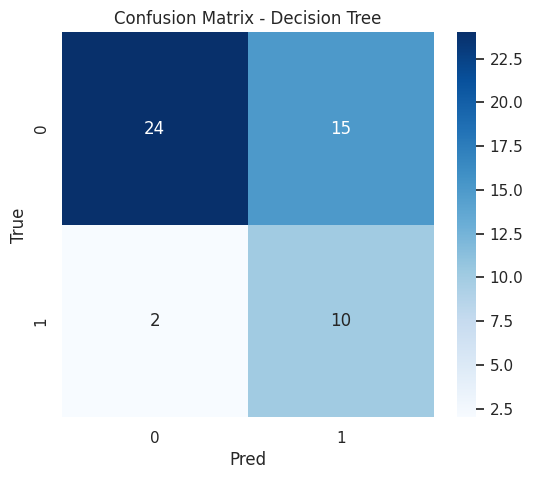

Decision Tree report:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74        39
           1       0.40      0.83      0.54        12

    accuracy                           0.67        51
   macro avg       0.66      0.72      0.64        51
weighted avg       0.80      0.67      0.69        51



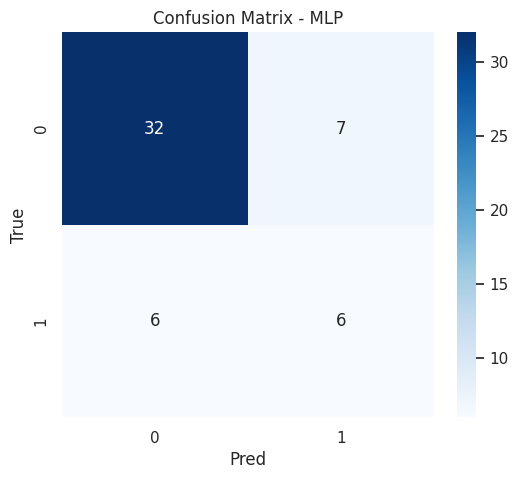

MLP report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        39
           1       0.46      0.50      0.48        12

    accuracy                           0.75        51
   macro avg       0.65      0.66      0.66        51
weighted avg       0.75      0.75      0.75        51



In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree'); plt.xlabel('Pred'); plt.ylabel('True'); plt.show()
print("Decision Tree report:\n", classification_report(y_test, y_pred_dt))

# MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLP'); plt.xlabel('Pred'); plt.ylabel('True'); plt.show()
print("MLP report:\n", classification_report(y_test, y_pred_mlp))


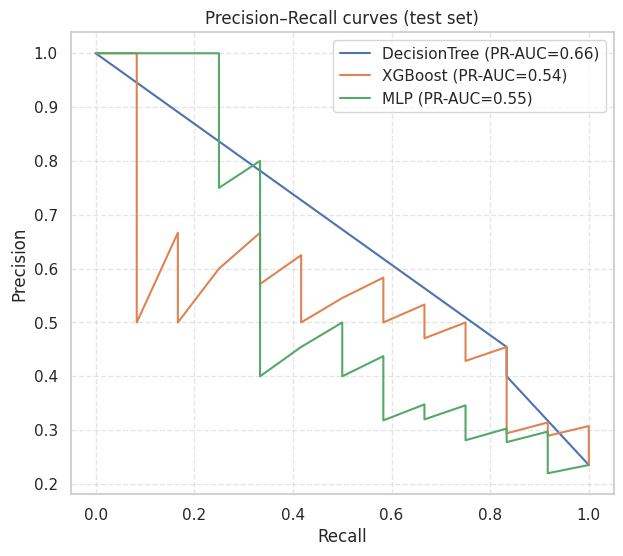

In [23]:
from sklearn.metrics import precision_recall_curve, auc

plt.figure(figsize=(7,6))
for name, proba in models.items():
    prec, rec, _ = precision_recall_curve(y_test, proba)
    pr_auc = auc(rec, prec)
    plt.plot(rec, prec, label=f"{name} (PR-AUC={pr_auc:.2f})")

plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision‚ÄìRecall curves (test set)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [24]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# –†–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ –º–µ—Ç—Ä–∏–∫
results = {
    "DecisionTree": {
        "accuracy": accuracy_score(y_test, y_pred_dt),
        "precision": precision_score(y_test, y_pred_dt),
        "recall": recall_score(y_test, y_pred_dt),
        "f1": f1_score(y_test, y_pred_dt),
        "roc_auc": roc_auc_score(y_test, y_proba_dt)
    },
    "XGBoost": {
        "accuracy": accuracy_score(y_test, y_pred_xgb),
        "precision": precision_score(y_test, y_pred_xgb),
        "recall": recall_score(y_test, y_pred_xgb),
        "f1": f1_score(y_test, y_pred_xgb),
        "roc_auc": roc_auc_score(y_test, y_proba_xgb)
    },
    "MLP": {
        "accuracy": accuracy_score(y_test, y_pred_mlp),
        "precision": precision_score(y_test, y_pred_mlp),
        "recall": recall_score(y_test, y_pred_mlp),
        "f1": f1_score(y_test, y_pred_mlp),
        "roc_auc": roc_auc_score(y_test, y_proba_mlp)
    }
}

df_results = pd.DataFrame(results).T
print(df_results)

# –∑–±–µ—Ä–µ–∂–µ–º–æ —É Excel / CSV –¥–ª—è –∑–≤—ñ—Ç—É
df_results.to_excel("model_results.xlsx", index=True)


              accuracy  precision    recall        f1   roc_auc
DecisionTree  0.666667   0.400000  0.833333  0.540541  0.756410
XGBoost       0.784314   0.533333  0.666667  0.592593  0.792735
MLP           0.745098   0.461538  0.500000  0.480000  0.696581


In [35]:
import pandas as pd

# ----------------------------- 1) Prevalence -----------------------------
if "year" in df.columns:
    prevalence_by_year = df.groupby("year")["Vulnerability"].agg(["count","sum","mean"]).round(3)
else:
    prevalence_by_year = df["Vulnerability"].value_counts().to_frame("count")

# ----------------------------- 2) Feature importance -----------------------------
fi_dt, fi_xgb = None, None

# Decision Tree
if "dt" in globals():
    fi_dt = pd.DataFrame({
        "feature": features,
        "importance": dt.feature_importances_
    }).sort_values("importance", ascending=False)

# XGBoost
if "best_xgb" in globals():
    fi_xgb = pd.DataFrame({
        "feature": features,
        "importance": best_xgb.feature_importances_
    }).sort_values("importance", ascending=False)

# ----------------------------- 3) Clustering -----------------------------
df_clusters = None
cluster_summary = None

if "cluster_labels" in globals():
    df_clusters = df.copy()
    df_clusters["cluster"] = cluster_labels

    cluster_summary = df_clusters.groupby("cluster")[features].mean().round(2)

# ----------------------------- 4) –ó–±–µ—Ä–µ–∂–µ–Ω–Ω—è —É Excel -----------------------------
with pd.ExcelWriter("report_tables.xlsx") as writer:
    prevalence_by_year.to_excel(writer, sheet_name="prevalence_by_year")

    if fi_dt is not None:
        fi_dt.to_excel(writer, sheet_name="fi_DT", index=False)

    if fi_xgb is not None:
        fi_xgb.to_excel(writer, sheet_name="fi_XGB", index=False)

    if cluster_summary is not None:
        cluster_summary.to_excel(writer, sheet_name="clusters")

print("‚úÖ –£—Å—ñ —Ç–∞–±–ª–∏—Ü—ñ –∑–±–µ—Ä–µ–∂–µ–Ω–æ —É report_tables.xlsx")

# ----------------------------- 5) –ü–æ–∫–∞–∑–∞—Ç–∏ —É Colab -----------------------------
from IPython.display import display

print("\n=== Prevalence by Year ===")
display(prevalence_by_year)

if fi_dt is not None:
    print("\n=== Feature Importance (Decision Tree) ===")
    display(fi_dt)

if fi_xgb is not None:
    print("\n=== Feature Importance (XGBoost) ===")
    display(fi_xgb)

if cluster_summary is not None:
    print("\n=== Cluster Summary (UMAP + kMeans) ===")
    display(cluster_summary)


‚úÖ –£—Å—ñ —Ç–∞–±–ª–∏—Ü—ñ –∑–±–µ—Ä–µ–∂–µ–Ω–æ —É report_tables.xlsx

=== Prevalence by Year ===


count
Vulnerability       
0                191
1                 61


=== Feature Importance (Decision Tree) ===


feature  importance
12               Depression PHQ 9    0.721012
11                  Anxiety GAD 7    0.099569
6                             GPA    0.056720
3                  Marital status    0.052148
8                Current Drinkers    0.043691
1                             Age    0.014658
5   Internally Displaced Persons     0.012202
0                          Gender    0.000000
2            Family living nearby    0.000000
4                  Working Status    0.000000
7                 Current Smokers    0.000000
10                     –°ombatants    0.000000
9              Deceased Relatives    0.000000


=== Feature Importance (XGBoost) ===


feature  importance
12               Depression PHQ 9    0.178840
7                 Current Smokers    0.098351
2            Family living nearby    0.087743
8                Current Drinkers    0.084742
0                          Gender    0.081080
3                  Marital status    0.080838
4                  Working Status    0.062883
9              Deceased Relatives    0.062758
11                  Anxiety GAD 7    0.061609
5   Internally Displaced Persons     0.055647
6                             GPA    0.054185
1                             Age    0.049331
10                     –°ombatants    0.041992

In [36]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

def perf_table(model, X_train, y_train, X_val, y_val, name):
    # Train set
    y_pred_tr = model.predict(X_train)
    y_prob_tr = model.predict_proba(X_train)[:,1]
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_tr).ravel()
    acc_tr = (tp+tn)/(tp+tn+fp+fn)
    sens_tr = tp/(tp+fn) if (tp+fn)>0 else 0
    spec_tr = tn/(tn+fp) if (tn+fp)>0 else 0
    ppv_tr  = tp/(tp+fp) if (tp+fp)>0 else 0
    npv_tr  = tn/(tn+fn) if (tn+fn)>0 else 0
    f1_tr   = f1_score(y_train, y_pred_tr)
    auc_tr  = roc_auc_score(y_train, y_prob_tr)

    # Validation set
    y_pred_v = model.predict(X_val)
    y_prob_v = model.predict_proba(X_val)[:,1]
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred_v).ravel()
    acc_v = (tp+tn)/(tp+tn+fp+fn)
    sens_v = tp/(tp+fn) if (tp+fn)>0 else 0
    spec_v = tn/(tn+fp) if (tn+fp)>0 else 0
    ppv_v  = tp/(tp+fp) if (tp+fp)>0 else 0
    npv_v  = tn/(tn+fn) if (tn+fn)>0 else 0
    f1_v   = f1_score(y_val, y_pred_v)
    auc_v  = roc_auc_score(y_val, y_prob_v)

    return {
        "Model": name,
        "Train_AUC": auc_tr, "Train_Acc": acc_tr, "Train_Sens": sens_tr,
        "Train_Spec": spec_tr, "Train_PPV": ppv_tr, "Train_NPV": npv_tr, "Train_F1": f1_tr,
        "Val_AUC": auc_v, "Val_Acc": acc_v, "Val_Sens": sens_v,
        "Val_Spec": spec_v, "Val_PPV": ppv_v, "Val_NPV": npv_v, "Val_F1": f1_v
    }

# –ø—Ä–∏–∫–ª–∞–¥: –∑–±–∏—Ä–∞—î–º–æ –≤—Å—ñ –º–æ–¥–µ–ª—ñ
perf_results = []
perf_results.append(perf_table(best_xgb, X_train, y_train, X_test, y_test, "XGBoost"))
perf_results.append(perf_table(dt, X_train, y_train, X_test, y_test, "DecisionTree"))
perf_results.append(perf_table(mlp, X_train, y_train, X_test, y_test, "MLP"))

df_perf = pd.DataFrame(perf_results)
display(df_perf)
df_perf.to_excel("performance_train_val.xlsx", index=False)


Model  Train_AUC  Train_Acc  Train_Sens  Train_Spec  Train_PPV  \
0       XGBoost   0.975564   0.920398    0.918367    0.921053   0.789474   
1  DecisionTree   0.841300   0.706468    1.000000    0.611842   0.453704   
2           MLP   1.000000   1.000000    1.000000    1.000000   1.000000   

   Train_NPV  Train_F1   Val_AUC   Val_Acc  Val_Sens  Val_Spec   Val_PPV  \
0   0.972222  0.849057  0.792735  0.784314  0.666667  0.820513  0.533333   
1   1.000000  0.624204  0.756410  0.666667  0.833333  0.615385  0.400000   
2   1.000000  1.000000  0.696581  0.745098  0.500000  0.820513  0.461538   

    Val_NPV    Val_F1  
0  0.888889  0.592593  
1  0.923077  0.540541  
2  0.842105  0.480000

–í–∏–±—Ä–∞–Ω—ñ –æ–∑–Ω–∞–∫–∏: ['Anxiety GAD 7', 'Depression PHQ 9']


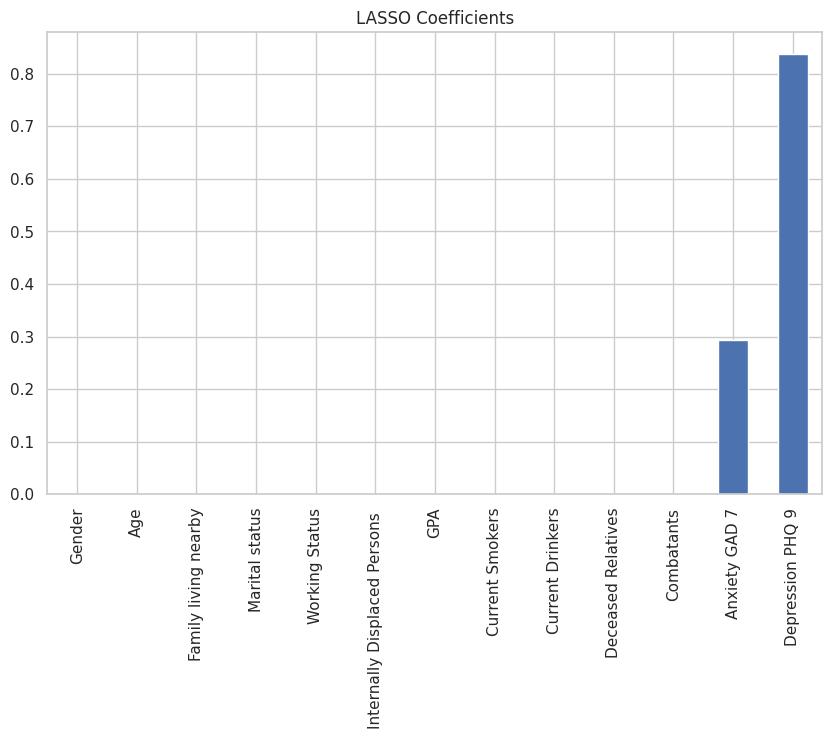

In [37]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑—É—î–º–æ X
scaler = StandardScaler()
X_std = scaler.fit_transform(df[features].fillna(0))
y_vec = df["Vulnerability"].values

# LASSO Logistic Regression (–∑ –∫—Ä–æ—Å-–≤–∞–ª—ñ–¥–∞—Ü—ñ—î—é)
lasso = LogisticRegressionCV(
    Cs=50, cv=5, penalty="l1", solver="saga", random_state=42, max_iter=5000
)
lasso.fit(X_std, y_vec)

# –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç–∏
coef = pd.Series(lasso.coef_.ravel(), index=features)
selected = coef[coef != 0]
print("–í–∏–±—Ä–∞–Ω—ñ –æ–∑–Ω–∞–∫–∏:", list(selected.index))

# --- –≥—Ä–∞—Ñ—ñ–∫ –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç—ñ–≤ ---
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
coef.plot(kind="bar")
plt.title("LASSO Coefficients")
plt.show()


[INFO] coef features=14 > names=13 -> –¥–æ–¥–∞–Ω–æ 1 —Ç–µ—Ö–Ω—ñ—á–Ω–∏—Ö –Ω–∞–∑–≤.


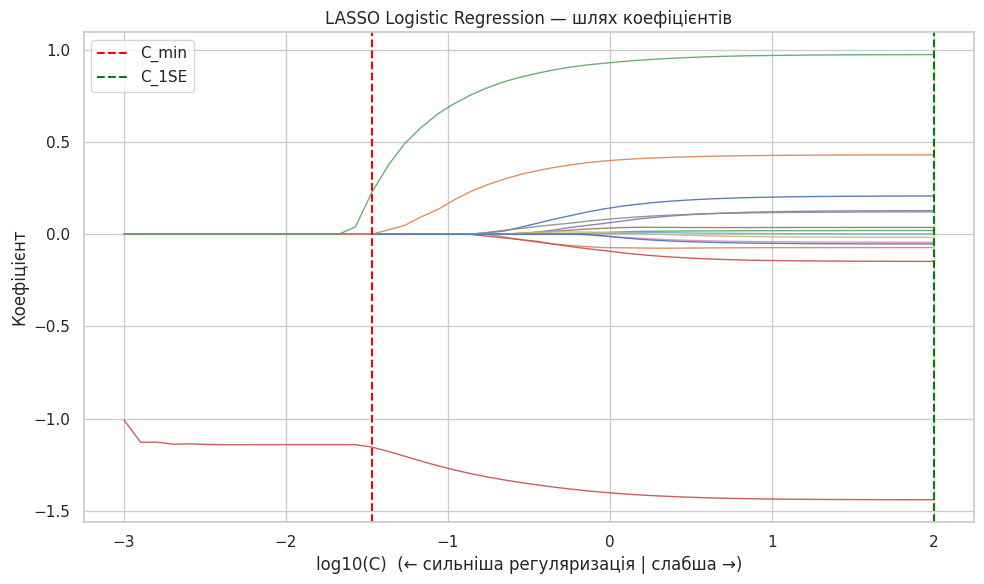

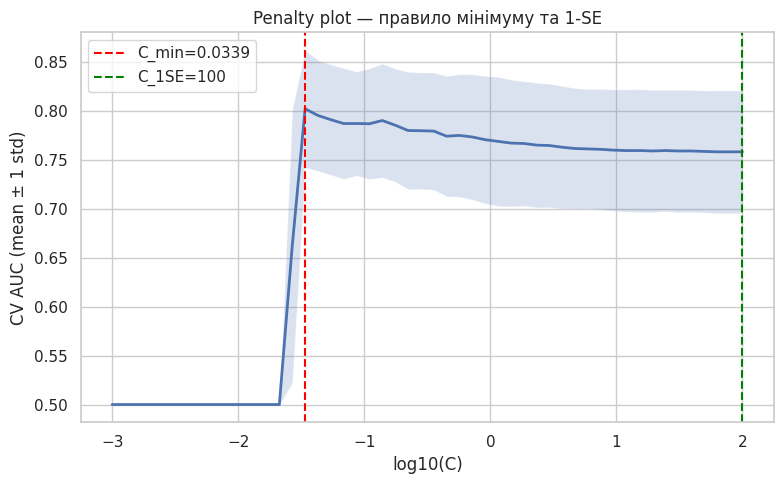


–í—ñ–¥—ñ–±—Ä–∞–Ω—ñ —Ñ—ñ—á—ñ –ø—Ä–∏ C_min:


coef
feat_13          -1.154783
Depression PHQ 9  0.226577


–í—ñ–¥—ñ–±—Ä–∞–Ω—ñ —Ñ—ñ—á—ñ –ø—Ä–∏ C_1SE (–ø—Ä–æ—Å—Ç—ñ—àa –º–æ–¥–µ–ª—å):


coef
feat_13                       -1.440430
Depression PHQ 9               0.973602
Anxiety GAD 7                  0.430030
Gender                         0.206892
Marital status                -0.147900
Working Status                 0.127567
Current Smokers                0.120513
Age                           -0.072614
–°ombatants                    -0.053338
GPA                           -0.044096
Internally Displaced Persons   0.036432
Family living nearby           0.019590
Current Drinkers              -0.017636
Deceased Relatives             0.001311

In [40]:
# 7) –£–∑–≥–æ–¥–∂–µ–Ω–Ω—è —ñ–º–µ–Ω –æ–∑–Ω–∞–∫ —ñ–∑ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç—ñ–≤
n_path_feats = coef_mean_path.shape[1]
names_len = len(X_cols)

if n_path_feats == names_len:
    feat_names_for_plot = list(X_cols)
elif n_path_feats > names_len:
    # –±—Ä–∞–∫—É—î –Ω–∞–∑–≤ ‚Äî –¥–æ–¥–∞–º–æ —Ç–µ—Ö–Ω—ñ—á–Ω—ñ —è—Ä–ª–∏–∫–∏
    missing = n_path_feats - names_len
    extra = [f"feat_{i}" for i in range(names_len, names_len + missing)]
    feat_names_for_plot = list(X_cols) + extra
    print(f"[INFO] coef features={n_path_feats} > names={names_len} -> –¥–æ–¥–∞–Ω–æ {missing} —Ç–µ—Ö–Ω—ñ—á–Ω–∏—Ö –Ω–∞–∑–≤.")
else:
    # –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç—ñ–≤ –º–µ–Ω—à–µ –Ω—ñ–∂ –Ω–∞–∑–≤ ‚Äî –ø—ñ–¥—Ä—ñ–∂–µ–º–æ
    feat_names_for_plot = list(X_cols[:n_path_feats])
    print(f"[INFO] coef features={n_path_feats} < names={names_len} -> –≤–∑—è—Ç–æ –ø–µ—Ä—à—ñ {n_path_feats} –Ω–∞–∑–≤.")

# 8) Coefficient profile plot (–∫—Ä–∏–≤—ñ ‚Äú—à–ª—è—Ö—É‚Äù)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for j in range(n_path_feats):
    plt.plot(np.log10(lasso_cv.Cs_), coef_mean_path[:, j], lw=1, alpha=0.9)
plt.axvline(np.log10(C_min), color='red', ls='--', label='C_min')
plt.axvline(np.log10(C_1se), color='green', ls='--', label='C_1SE')
plt.xlabel('log10(C)  (‚Üê —Å–∏–ª—å–Ω—ñ—à–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü—ñ—è | —Å–ª–∞–±—à–∞ ‚Üí)')
plt.ylabel('–ö–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç')
plt.title('LASSO Logistic Regression ‚Äî —à–ª—è—Ö –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç—ñ–≤')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Penalty plot (CV AUC vs C) –∑ –ø–æ–∑–Ω–∞—á–µ–Ω–Ω—è–º C_min —Ç–∞ C_1SE
plt.figure(figsize=(8,5))
plt.plot(np.log10(lasso_cv.Cs_), auc_mean, lw=2)
plt.fill_between(np.log10(lasso_cv.Cs_), auc_mean - auc_std, auc_mean + auc_std, alpha=0.2)
plt.axvline(np.log10(C_min), color='red', ls='--', label=f'C_min={C_min:.3g}')
plt.axvline(np.log10(C_1se), color='green', ls='--', label=f'C_1SE={C_1se:.3g}')
plt.xlabel('log10(C)')
plt.ylabel('CV AUC (mean ¬± 1 std)')
plt.title('Penalty plot ‚Äî –ø—Ä–∞–≤–∏–ª–æ –º—ñ–Ω—ñ–º—É–º—É —Ç–∞ 1-SE')
plt.legend()
plt.tight_layout()
plt.show()

# 10) –í—ñ–¥—ñ–±—Ä–∞–Ω—ñ –æ–∑–Ω–∞–∫–∏ –ø—Ä–∏ C_min —ñ C_1SE
coef_at_Cmin = coef_mean_path[idx_min, :]
coef_at_C1se = coef_mean_path[idx_1se, :]

sel_min = pd.Series(coef_at_Cmin, index=feat_names_for_plot)
sel_1se = pd.Series(coef_at_C1se, index=feat_names_for_plot)

selected_min = sel_min[sel_min != 0].sort_values(key=np.abs, ascending=False)
selected_1se = sel_1se[sel_1se != 0].sort_values(key=np.abs, ascending=False)

print("\n–í—ñ–¥—ñ–±—Ä–∞–Ω—ñ —Ñ—ñ—á—ñ –ø—Ä–∏ C_min:")
display(selected_min.to_frame('coef'))

print("\n–í—ñ–¥—ñ–±—Ä–∞–Ω—ñ —Ñ—ñ—á—ñ –ø—Ä–∏ C_1SE (–ø—Ä–æ—Å—Ç—ñ—àa –º–æ–¥–µ–ª—å):")
display(selected_1se.to_frame('coef'))

# (–û–ø—Ü—ñ–π–Ω–æ) –∑–±–µ—Ä–µ–∂–µ–Ω–Ω—è
pd.DataFrame({'C': lasso_cv.Cs_, 'AUC_mean': auc_mean, 'AUC_std': auc_std}).to_csv('lasso_penalty_curve.csv', index=False)
selected_min.to_csv('lasso_selected_Cmin.csv', header=['coef'])
selected_1se.to_csv('lasso_selected_C1SE.csv', header=['coef'])


In [41]:
import scipy.stats as stats

rows = []
for col in features:
    if df[col].dtype == "object" or len(df[col].unique()) < 10:
        # –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞
        ct = pd.crosstab(df[col], df["Vulnerability"])
        chi2, p, dof, exp = stats.chi2_contingency(ct)
        rows.append([col, "categorical", p])
    else:
        # —á–∏—Å–ª–æ–≤–∞
        group0 = df.loc[df["Vulnerability"]==0, col]
        group1 = df.loc[df["Vulnerability"]==1, col]
        stat, p = stats.mannwhitneyu(group0, group1, alternative="two-sided")
        rows.append([col, "numeric", p])

df_uni = pd.DataFrame(rows, columns=["Variable","Type","p_value"])
df_uni.to_excel("univariate_analysis.xlsx", index=False)
display(df_uni)


Variable         Type       p_value
0                          Gender  categorical  4.750239e-01
1                             Age      numeric  6.869931e-01
2            Family living nearby  categorical  8.651966e-01
3                  Marital status  categorical  7.574591e-01
4                  Working Status  categorical  8.008122e-01
5   Internally Displaced Persons   categorical  6.556117e-01
6                             GPA      numeric  4.728957e-01
7                 Current Smokers  categorical  3.901290e-02
8                Current Drinkers  categorical  8.867504e-01
9              Deceased Relatives  categorical  3.502996e-01
10                     –°ombatants  categorical  8.220002e-01
11                  Anxiety GAD 7      numeric  7.070517e-05
12               Depression PHQ 9      numeric  1.765574e-12

In [42]:
from sklearn.mixture import GaussianMixture

fits = []
for k in [1,2,3,4]:
    gm = GaussianMixture(n_components=k, random_state=42).fit(X_std)
    fits.append([k, gm.aic(X_std), gm.bic(X_std)])

df_fit = pd.DataFrame(fits, columns=["Class","AIC","BIC"])
display(df_fit)


Class          AIC          BIC
0      1  9241.424607  9608.485232
1      2  5777.000056  6514.650735
2      3  1417.954652  2526.195386
3      4 -2968.943522 -1490.112734

In [43]:
from sklearn.mixture import GaussianMixture
import numpy as np, pandas as pd

X = df[features].fillna(0).values  # —Ç—ñ –∂ —Å–∞–º—ñ —Ñ—ñ—á—ñ, —â–æ —É –º–æ–¥–µ–ª—è—Ö

results = []
for k in [1,2,3,4]:
    gm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gm.fit(X)
    aic = gm.aic(X)
    bic = gm.bic(X)
    n = len(X)
    d = X.shape[1] * k  # –ø—Ä–∏–±–ª–∏–∑–Ω–æ —á–∏—Å–ª–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
    abic = bic - np.log(n)*(d-1)  # –Ω–∞–±–ª–∏–∂–µ–Ω–æ "adjusted BIC"

    # Entropy: –º—ñ—Ä–∞ –≤–∏–∑–Ω–∞—á–µ–Ω–æ—Å—Ç—ñ –∫–ª–∞—Å—Ç–µ—Ä–Ω–æ—ó –Ω–∞–ª–µ–∂–Ω–æ—Å—Ç—ñ
    resp = gm.predict_proba(X)
    entropy = 1 - (-np.sum(resp*np.log(resp+1e-12)) / (n*np.log(k)))

    # sample proportions
    labels = gm.predict(X)
    props = np.round(100*np.bincount(labels)/n, 2)
    props_str = "/".join(map(str, props))

    results.append([k, aic, bic, abic, entropy, props_str])

df_gof = pd.DataFrame(results, columns=["Class","AIC","BIC","aBIC","Entropy","Sample proportion (%) per class"])
display(df_gof)
df_gof.to_excel("goodness_of_fit.xlsx", index=False)


/tmp/ipython-input-1635816623.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  entropy = 1 - (-np.sum(resp*np.log(resp+1e-12)) / (n*np.log(k)))


Class          AIC          BIC         aBIC   Entropy  \
0      1  6316.901256  6683.961881  6617.608732       inf   
1      2   938.130723  1675.781402  1537.545675  0.999997   
2      3   446.689821  1554.930554  1344.812249  0.981949   
3      4   457.391997  1936.222785  1654.221901  0.999954   

  Sample proportion (%) per class  
0                           100.0  
1                       25.4/74.6  
2                 8.73/7.94/83.33  
3           3.57/4.76/11.11/80.56

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from sklearn.utils import resample

import numpy as np, pandas as pd

def bootstrap_auc_ci(model, X, y, n_boot=1000, alpha=0.05):
    """–û–±—á–∏—Å–ª—é—î AUC —Ç–∞ 95% CI –±—É—Ç—Å—Ç—Ä–µ–ø–æ–º"""
    aucs = []
    for _ in range(n_boot):
        idx = np.random.choice(len(y), len(y), replace=True)
        if len(np.unique(y[idx])) < 2:
            continue
        y_pred = model.predict_proba(X[idx])[:,1]
        aucs.append(roc_auc_score(y[idx], y_pred))
    if len(aucs) == 0:
        return np.nan, (np.nan, np.nan)
    lower = np.percentile(aucs, 100*alpha/2)
    upper = np.percentile(aucs, 100*(1-alpha/2))
    return np.mean(aucs), (lower, upper)

def eval_model(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)

    results = {}
    for split, X, y in [("Train", X_train, y_train), ("Validation", X_test, y_test)]:
        y_pred = model.predict(X)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X)[:,1]
        else:
            y_proba = model.decision_function(X)

        auc, (ci_low, ci_high) = bootstrap_auc_ci(model, X, y)

        acc = accuracy_score(y, y_pred)
        sens = recall_score(y, y_pred, pos_label=1)
        spec = recall_score(y, y_pred, pos_label=0)
        ppv  = precision_score(y, y_pred, pos_label=1, zero_division=0)
        npv  = precision_score(y, y_pred, pos_label=0, zero_division=0)
        f1   = f1_score(y, y_pred, pos_label=1)

        results[(split, name)] = {
            "AUC (95% CI)": f"{auc:.3f} ({ci_low:.3f}, {ci_high:.3f})",
            "Accuracy": round(acc,3),
            "Sensitivity": round(sens,3),
            "Specificity": round(spec,3),
            "PPV": round(ppv,3),
            "NPV": round(npv,3),
            "F1score": round(f1,3)
        }
    return results

# üîπ –°–ø–∏—Å–æ–∫ –º–æ–¥–µ–ª–µ–π
models = {
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LR": LogisticRegression(max_iter=1000, solver='liblinear'),
    "RF": RandomForestClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GBDT": GradientBoostingClassifier(random_state=42),
    "GNB": GaussianNB(),
    "MLP": MLPClassifier(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

all_results = {}
for name, model in models.items():
    res = eval_model(model, X_train, y_train, X_test, y_test, name)
    all_results.update(res)

# üîπ –§–æ—Ä–º—É—î–º–æ –¥–≤—ñ —Ç–∞–±–ª–∏—Ü—ñ
train_table = pd.DataFrame({m: all_results[("Train", m)] for m in models}).T
val_table   = pd.DataFrame({m: all_results[("Validation", m)] for m in models}).T

print("=== Training set ===")
display(train_table)

print("\n=== Validation set ===")
display(val_table)

# –ó–±–µ—Ä–µ–≥—Ç–∏ —É Excel
with pd.ExcelWriter("predictive_performance.xlsx") as writer:
    train_table.to_excel(writer, sheet_name="Training")
    val_table.to_excel(writer, sheet_name="Validation")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:33:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Training set ===


AUC (95% CI) Accuracy Sensitivity Specificity    PPV    NPV  \
XGBoost   1.000 (1.000, 1.000)      1.0         1.0         1.0    1.0    1.0   
LR        0.817 (0.756, 0.877)    0.786       0.327       0.934  0.615  0.811   
RF        1.000 (1.000, 1.000)      1.0         1.0         1.0    1.0    1.0   
AdaBoost  0.859 (0.804, 0.906)    0.796       0.449       0.908  0.611  0.836   
GBDT      0.994 (0.980, 1.000)     0.98       0.939       0.993  0.979  0.981   
GNB       0.777 (0.701, 0.846)    0.736       0.469       0.822   0.46  0.828   
MLP       0.846 (0.788, 0.902)    0.776       0.122       0.987   0.75  0.777   
SVM       0.927 (0.877, 0.965)    0.821       0.306       0.987  0.882  0.815   

         F1score  
XGBoost      1.0  
LR         0.427  
RF           1.0  
AdaBoost   0.518  
GBDT       0.958  
GNB        0.465  
MLP        0.211  
SVM        0.455


=== Validation set ===


AUC (95% CI) Accuracy Sensitivity Specificity    PPV    NPV  \
XGBoost   0.745 (0.565, 0.895)    0.725       0.333       0.846    0.4  0.805   
LR        0.733 (0.517, 0.910)    0.804        0.25       0.974   0.75  0.809   
RF        0.806 (0.621, 0.942)    0.804       0.333       0.949  0.667  0.822   
AdaBoost  0.774 (0.581, 0.934)    0.804       0.417       0.923  0.625  0.837   
GBDT      0.829 (0.683, 0.947)    0.804         0.5       0.897    0.6  0.854   
GNB       0.824 (0.600, 0.974)    0.824       0.667       0.872  0.615  0.895   
MLP       0.803 (0.623, 0.944)    0.804       0.167         1.0    1.0  0.796   
SVM       0.748 (0.565, 0.911)    0.804       0.167         1.0    1.0  0.796   

         F1score  
XGBoost    0.364  
LR         0.375  
RF         0.444  
AdaBoost     0.5  
GBDT       0.545  
GNB         0.64  
MLP        0.286  
SVM        0.286

In [45]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set(style='whitegrid')
from sklearn.metrics import (roc_curve, auc, precision_recall_curve, brier_score_loss,
                             confusion_matrix, classification_report)
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# 1) –û–ø–∏—Å –º–æ–¥–µ–ª–µ–π (–º–æ–∂–µ—à –ø—ñ–¥–ø—Ä–∞–≤–∏—Ç–∏ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –∑–∞ –±–∞–∂–∞–Ω–Ω—è–º)
models = {
    "DecisionTree": DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced'),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False),
    "LR": LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced'),
    "RF": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1, class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GBDT": GradientBoostingClassifier(random_state=42),
    "GNB": GaussianNB(),
    "MLP": None,  # –¥–æ–¥–∞–º–æ –Ω–∏–∂—á–µ, —è–∫—â–æ –≤–∂–µ —ñ–º–ø–æ—Ä—Ç–æ–≤–∞–Ω–æ
    "SVM": SVC(probability=True, random_state=42)
}

# MLP (—è–∫—â–æ —Ç–∏ –≤–∂–µ —ñ–º–ø–æ—Ä—Ç—É–≤–∞–ª–∞ —Ä–∞–Ω—ñ—à–µ ‚Äî –º–æ–∂–Ω–∞ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏ —Å–≤—ñ–π)
from sklearn.neural_network import MLPClassifier
models["MLP"] = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)

# 2) –ù–∞–≤—á–∏–º–æ –≤—Å—ñ –º–æ–¥–µ–ª—ñ –Ω–∞ train (–Ω–∞ –≤—Å—è–∫ –≤–∏–ø–∞–¥–æ–∫, —â–æ–± –≥–∞—Ä–∞–Ω—Ç–æ–≤–∞–Ω–æ –±—É–ª–∏ –Ω–∞–≤—á–µ–Ω—ñ)
fitted = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    fitted[name] = mdl
print("Trained models:", list(fitted.keys()))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:37:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Trained models: ['DecisionTree', 'XGBoost', 'LR', 'RF', 'AdaBoost', 'GBDT', 'GNB', 'MLP', 'SVM']


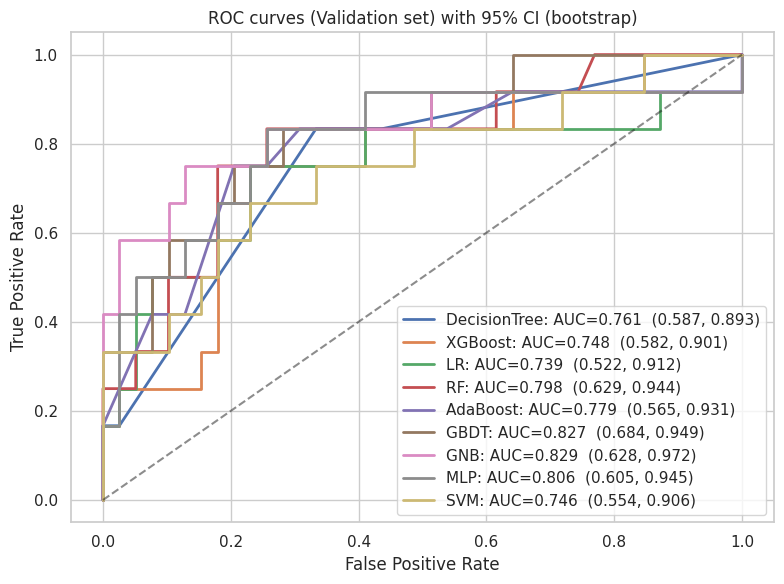

In [46]:
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

def bootstrap_roc_ci(model, X, y, n_boot=1000, alpha=0.05):
    aucs = []
    for _ in range(n_boot):
        idx = np.random.choice(len(y), len(y), replace=True)
        y_b = y[idx]
        if len(np.unique(y_b))<2:  # –ø—Ä–æ–ø—É—Å–∫–∞—î–º–æ –±—É—Ç—Å—Ç—Ä–µ–ø –±–µ–∑ –¥–≤–æ—Ö –∫–ª–∞—Å—ñ–≤
            continue
        y_p = model.predict_proba(X[idx])[:,1]
        aucs.append(roc_auc_score(y_b, y_p))
    if len(aucs)==0:
        return np.nan, (np.nan, np.nan)
    return np.mean(aucs), (np.percentile(aucs, 2.5), np.percentile(aucs, 97.5))

plt.figure(figsize=(8,6))
for name, mdl in fitted.items():
    y_proba = mdl.predict_proba(X_test)[:,1] if hasattr(mdl,'predict_proba') else mdl.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    mu, (lo, hi) = bootstrap_roc_ci(mdl, X_test, y_test, n_boot=1000)
    label = f"{name}: AUC={roc_auc:.3f}  ({lo:.3f}, {hi:.3f})"
    plt.plot(fpr, tpr, lw=2, label=label)

plt.plot([0,1],[0,1],'k--',alpha=0.5)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC curves (Validation set) with 95% CI (bootstrap)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


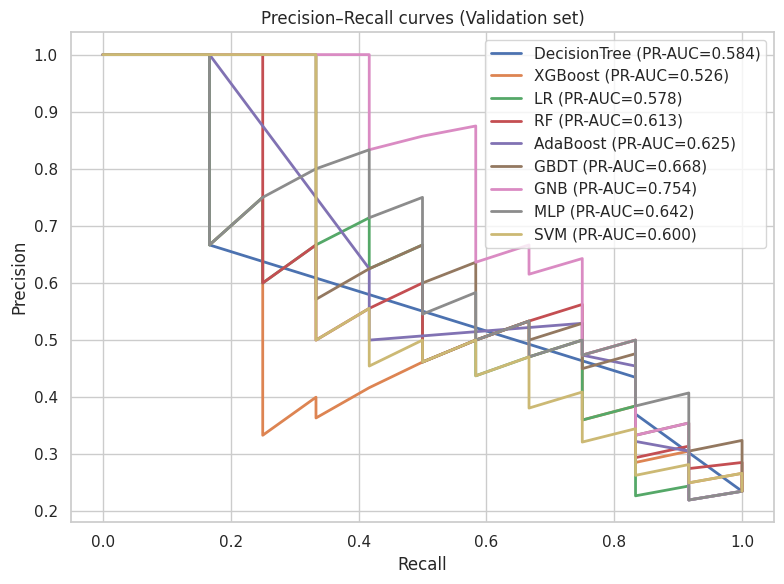

In [47]:
plt.figure(figsize=(8,6))
for name, mdl in fitted.items():
    y_proba = mdl.predict_proba(X_test)[:,1] if hasattr(mdl,'predict_proba') else mdl.decision_function(X_test)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(rec, prec)
    plt.plot(rec, prec, lw=2, label=f"{name} (PR-AUC={pr_auc:.3f})")

plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision‚ÄìRecall curves (Validation set)")
plt.legend()
plt.tight_layout()
plt.show()


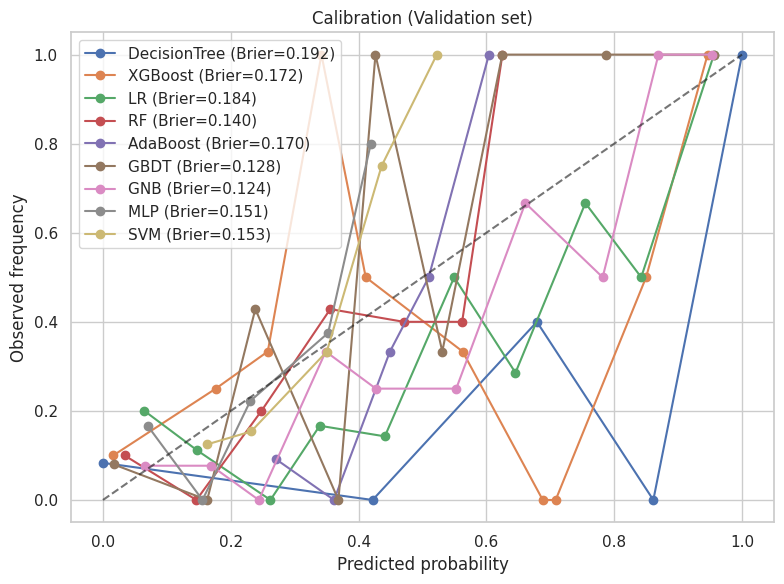

In [48]:
plt.figure(figsize=(8,6))
for name, mdl in fitted.items():
    if not hasattr(mdl, 'predict_proba') and not hasattr(mdl, 'decision_function'):
        continue
    y_proba = mdl.predict_proba(X_test)[:,1] if hasattr(mdl,'predict_proba') else 1/(1+np.exp(-mdl.decision_function(X_test)))
    prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='uniform')
    bs = brier_score_loss(y_test, y_proba)
    plt.plot(prob_pred, prob_true, marker='o', label=f"{name} (Brier={bs:.3f})")

plt.plot([0,1],[0,1],'k--',alpha=0.6)
plt.xlabel("Predicted probability"); plt.ylabel("Observed frequency")
plt.title("Calibration (Validation set)")
plt.legend()
plt.tight_layout()
plt.show()


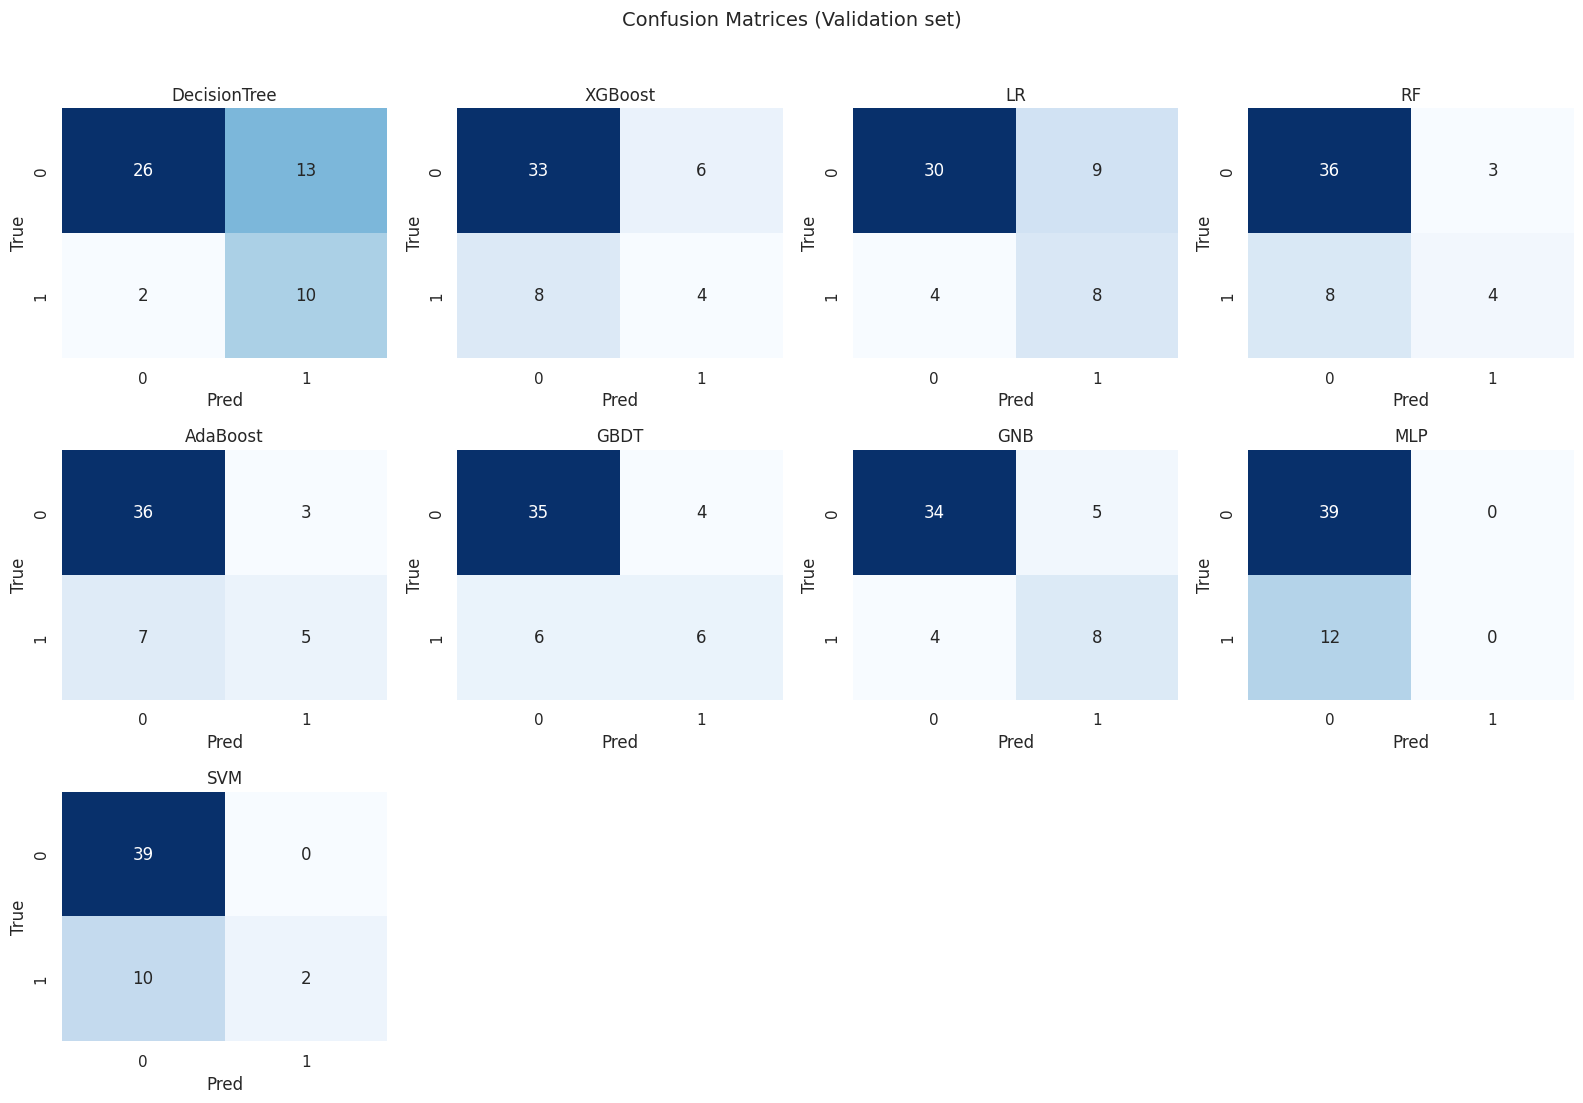

In [49]:
import math
n = len(fitted)
cols = 4
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.6*rows))
axes = axes.ravel()

for ax, (name, mdl) in zip(axes, fitted.items()):
    y_pred = mdl.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Pred'); ax.set_ylabel('True')

# –ø–æ—Ä–æ–∂–Ω—ñ –æ—Å–µ—Ä–µ–¥–∫–∏ (—è–∫—â–æ –º–æ–¥–µ–ª–µ–π –º–µ–Ω—à–µ, –Ω—ñ–∂ —Å—ñ—Ç–∫–∞) –ø—Ä–∏–±–µ—Ä–µ–º–æ
for i in range(len(fitted), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle("Confusion Matrices (Validation set)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


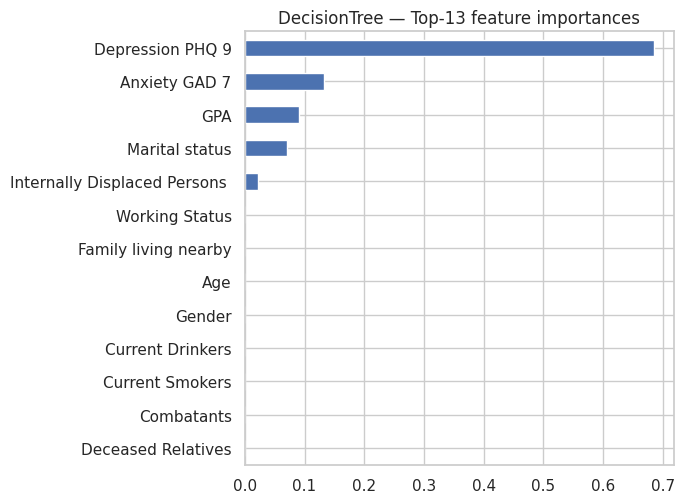

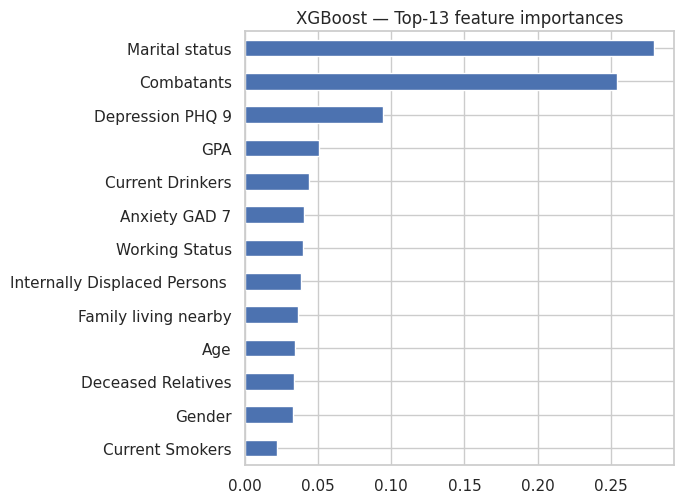

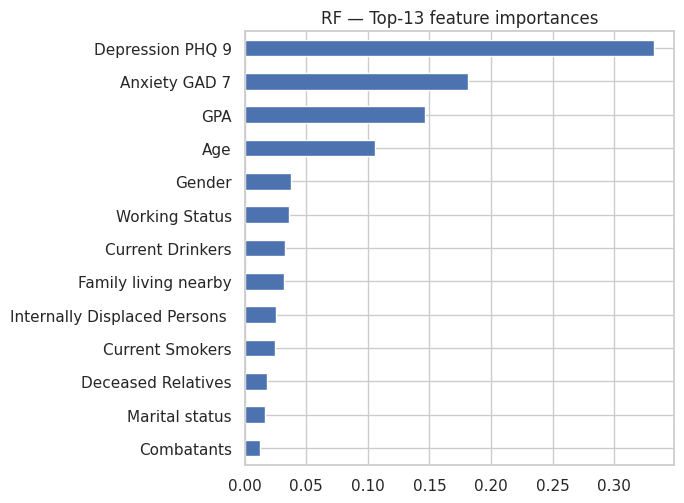

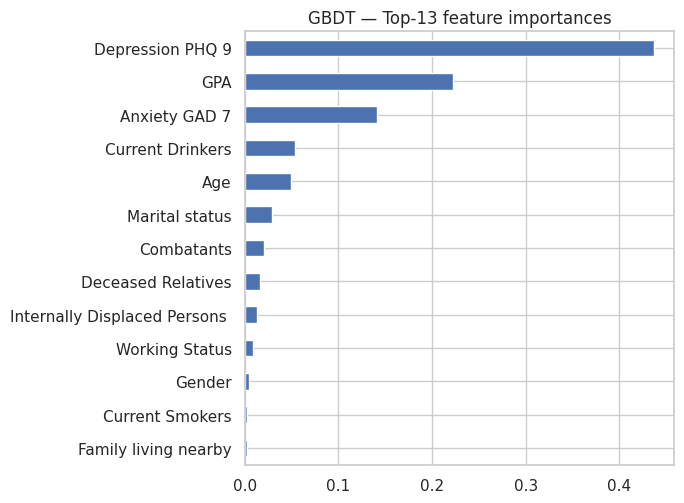

In [50]:
def plot_importance(model, model_name, features, top=15):
    if hasattr(model, "feature_importances_"):
        imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)[:top]
        plt.figure(figsize=(7, max(4, 0.4*len(imp))))
        imp.iloc[::-1].plot(kind='barh')
        plt.title(f"{model_name} ‚Äî Top-{len(imp)} feature importances")
        plt.tight_layout()
        plt.show()

for name in ["DecisionTree","XGBoost","RF","GBDT"]:
    if name in fitted:
        plot_importance(fitted[name], name, features, top=15)


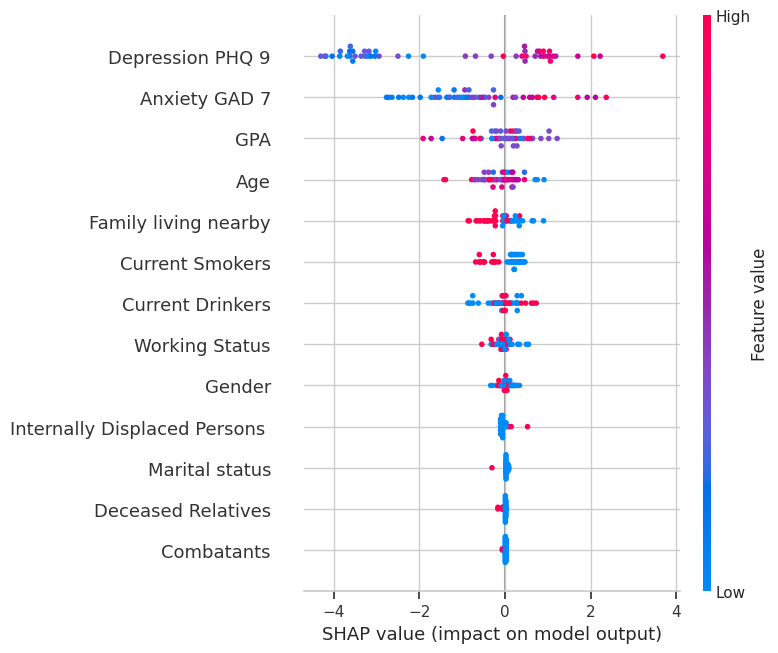

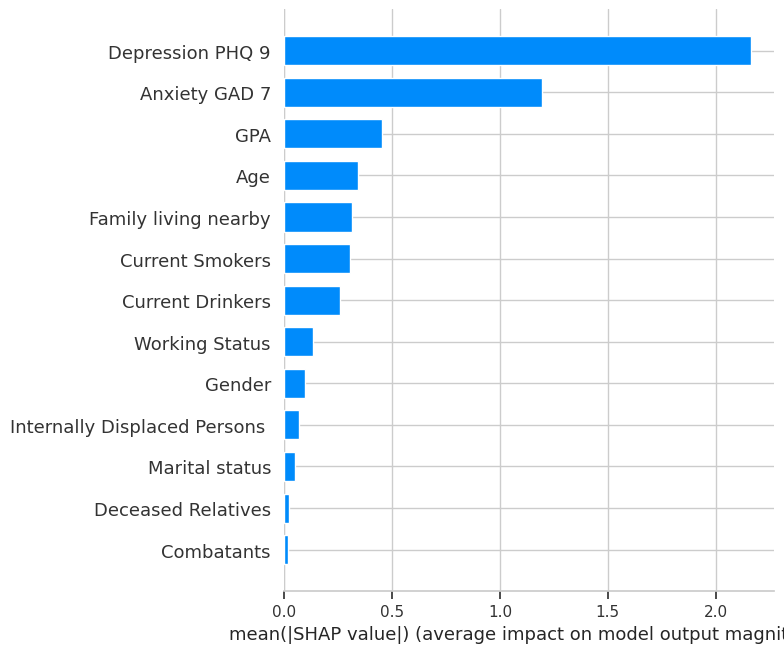

In [51]:
!pip -q install shap
import shap, numpy as np
xgb_model = fitted["XGBoost"]
explainer = shap.TreeExplainer(xgb_model)
# –Ω–µ–≤–µ–ª–∏–∫–∞ –≤–∏–±—ñ—Ä–∫–∞ –¥–ª—è —à–≤–∏–¥–∫–æ—Å—Ç—ñ
idx = np.random.choice(X_test.shape[0], min(200, X_test.shape[0]), replace=False)
X_te_small = X_test[idx]
shap_vals = explainer.shap_values(X_te_small)
shap.summary_plot(shap_vals, pd.DataFrame(X_te_small, columns=features), show=True)
shap.summary_plot(shap_vals, pd.DataFrame(X_te_small, columns=features), plot_type='bar', show=True)


Model       AUC  Accuracy  Sensitivity  Specificity       PPV  \
6           GNB  0.829060  0.823529     0.666667     0.871795  0.615385   
5          GBDT  0.826923  0.803922     0.500000     0.897436  0.600000   
7           MLP  0.805556  0.764706     0.000000     1.000000  0.000000   
3            RF  0.798077  0.784314     0.333333     0.923077  0.571429   
4      AdaBoost  0.778846  0.803922     0.416667     0.923077  0.625000   
0  DecisionTree  0.760684  0.705882     0.833333     0.666667  0.434783   
1       XGBoost  0.747863  0.725490     0.333333     0.846154  0.400000   
8           SVM  0.745726  0.803922     0.166667     1.000000  1.000000   
2            LR  0.739316  0.745098     0.666667     0.769231  0.470588   

        NPV        F1  
6  0.894737  0.640000  
5  0.853659  0.545455  
7  0.764706  0.000000  
3  0.818182  0.421053  
4  0.837209  0.500000  
0  0.928571  0.571429  
1  0.804878  0.363636  
8  0.795918  0.285714  
2  0.882353  0.551724

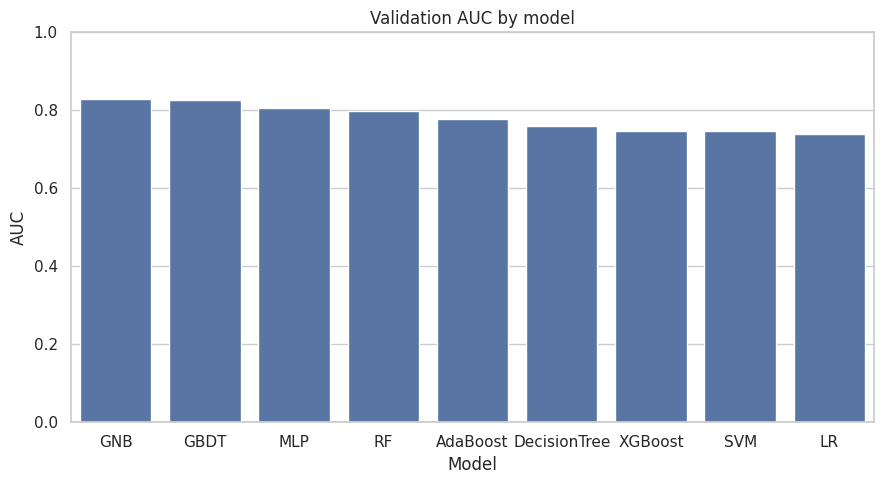

In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

rows = []
for name, mdl in fitted.items():
    y_pred = mdl.predict(X_test)
    y_proba = mdl.predict_proba(X_test)[:,1] if hasattr(mdl,'predict_proba') else mdl.decision_function(X_test)
    rows.append({
        "Model": name,
        "AUC": roc_auc_score(y_test, y_proba),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Sensitivity": recall_score(y_test, y_pred, pos_label=1),
        "Specificity": recall_score(y_test, y_pred, pos_label=0),
        "PPV": precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        "NPV": precision_score(y_test, y_pred, pos_label=0, zero_division=0),
        "F1": f1_score(y_test, y_pred)
    })
df_cmp = pd.DataFrame(rows).sort_values("AUC", ascending=False)
display(df_cmp)

plt.figure(figsize=(9,5))
sns.barplot(data=df_cmp, x="Model", y="AUC")
plt.title("Validation AUC by model")
plt.ylim(0,1)
plt.tight_layout(); plt.show()


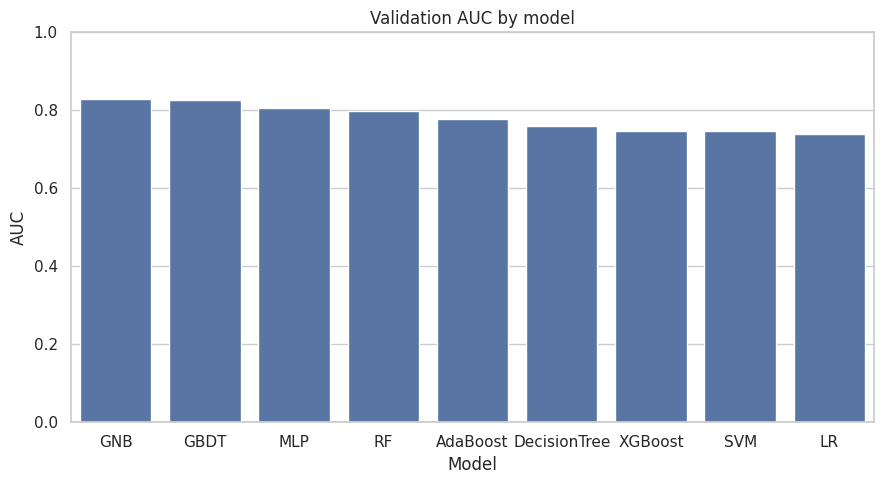

In [53]:
# –ü—Ä–∏–∫–ª–∞–¥: –∑–±–µ—Ä–µ–∂–µ–Ω–Ω—è –æ—Å—Ç–∞–Ω–Ω—å–æ–≥–æ –≥—Ä–∞—Ñ—ñ–∫–∞
plt.figure(figsize=(9,5))
sns.barplot(data=df_cmp, x="Model", y="AUC")
plt.title("Validation AUC by model")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("val_auc_by_model.png", dpi=300)
plt.show()
